**In this notebook data from HMDD database and LncRNADisease database related to miRNA-disease, lncRNA-disease and circRNA-disease associations is processed, inserted into SQL tables and analysed.**

In [208]:
import pandas as pd

***HMDD Database data processing***

In [209]:
#S1_HMDD3_causal_info.xlsx is the HMDD3 causal association information dataset from HMDD database. 
#Contains MiRNA-disease associations
hmdd_data = pd.read_excel("S1_HMDD3_causal_info.xlsx")
hmdd_data

,category,mir,disease,mesh_name,pmid,causality
0,circulation_biomarker_diagnosis_down,hsa-mir-15a,"Leukemia, Lymphocytic, Chronic, B-Cell","Leukemia, Lymphocytic, Chronic, B-Cell",15737576,no
1,circulation_biomarker_diagnosis_down,hsa-mir-16,"Leukemia, Lymphocytic, Chronic, B-Cell","Leukemia, Lymphocytic, Chronic, B-Cell",15737576,no
2,circulation_biomarker_diagnosis_down,hsa-mir-143,Colon Neoplasms,Colonic Neoplasms,16195701,no
3,circulation_biomarker_diagnosis_down,hsa-mir-145,Colon Neoplasms,Colonic Neoplasms,16195701,no
4,circulation_biomarker_diagnosis_down,hsa-mir-223,"Leukemia, Lymphocytic, Chronic, B-Cell","Leukemia, Lymphocytic, Chronic, B-Cell",16251535,no
...,...,...,...,...,...,...
35542,tissue_expression_up,hsa-mir-3648,Neoplasms [unspecific],Neoplasms,30384176,no
35543,tissue_expression_up,hsa-mir-3687,Neoplasms [unspecific],Neoplasms,30384176,no
35544,tissue_expression_up,hsa-mir-4746,Neoplasms [unspecific],Neoplasms,30384176,no
35545,tissue_expression_up,hsa-mir-760,Neoplasms [unspecific],Neoplasms,30384176,no


In [210]:
#counts the number of different diseases in MeSH terminology (column "mesh_name")
hmdd_data['mesh_name'].nunique()

640

In [211]:
#Selection of the columns of interest. These are "mir", "mesh_name", "category" and "causality".
#column "category" informs about the type of relationship between a certain miRNA and a certain disease
#column "causality" specifies whether a miRNA is significantly involved in the disease mechanism or not)
hmdd_data = hmdd_data[['mir','causality', 'category', 'mesh_name']].drop_duplicates()
hmdd_data

,mir,causality,category,mesh_name
0,hsa-mir-15a,no,circulation_biomarker_diagnosis_down,"Leukemia, Lymphocytic, Chronic, B-Cell"
1,hsa-mir-16,no,circulation_biomarker_diagnosis_down,"Leukemia, Lymphocytic, Chronic, B-Cell"
2,hsa-mir-143,no,circulation_biomarker_diagnosis_down,Colonic Neoplasms
3,hsa-mir-145,no,circulation_biomarker_diagnosis_down,Colonic Neoplasms
4,hsa-mir-223,no,circulation_biomarker_diagnosis_down,"Leukemia, Lymphocytic, Chronic, B-Cell"
...,...,...,...,...
35541,hsa-mir-301b,no,tissue_expression_up,Neoplasms
35542,hsa-mir-3648,no,tissue_expression_up,Neoplasms
35543,hsa-mir-3687,no,tissue_expression_up,Neoplasms
35544,hsa-mir-4746,no,tissue_expression_up,Neoplasms


In [212]:
#checking if there are columns with NaN values
print(hmdd_data['mir'].isnull().values.any())
print(hmdd_data['causality'].isnull().values.any())
print(hmdd_data['category'].isnull().values.any())
print(hmdd_data['mesh_name'].isnull().values.any())

False
False
False
True


In [213]:
#some rna-disease associations have NaN values in the "mesh_name" column
#in this case, we won't consider those associations for our analysis.
hmdd_data_1 = hmdd_data.dropna()
hmdd_data_1

,mir,causality,category,mesh_name
0,hsa-mir-15a,no,circulation_biomarker_diagnosis_down,"Leukemia, Lymphocytic, Chronic, B-Cell"
1,hsa-mir-16,no,circulation_biomarker_diagnosis_down,"Leukemia, Lymphocytic, Chronic, B-Cell"
2,hsa-mir-143,no,circulation_biomarker_diagnosis_down,Colonic Neoplasms
3,hsa-mir-145,no,circulation_biomarker_diagnosis_down,Colonic Neoplasms
4,hsa-mir-223,no,circulation_biomarker_diagnosis_down,"Leukemia, Lymphocytic, Chronic, B-Cell"
...,...,...,...,...
35541,hsa-mir-301b,no,tissue_expression_up,Neoplasms
35542,hsa-mir-3648,no,tissue_expression_up,Neoplasms
35543,hsa-mir-3687,no,tissue_expression_up,Neoplasms
35544,hsa-mir-4746,no,tissue_expression_up,Neoplasms


In [214]:
#Creation of columns "source_id" and "source_name".
#This will identify in DISNET where the information from miRNA-disease association comes from.
hmdd_data_1['source_id'] = 5
hmdd_data_1['source_name'] = "HMDD v3.2"
hmdd_data_1

<ipython-input-214-59f3db3f2991>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hmdd_data_1['source_id'] = 5
<ipython-input-214-59f3db3f2991>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hmdd_data_1['source_name'] = "HMDD v3.2"


,mir,causality,category,mesh_name,source_id,source_name
0,hsa-mir-15a,no,circulation_biomarker_diagnosis_down,"Leukemia, Lymphocytic, Chronic, B-Cell",5,HMDD v3.2
1,hsa-mir-16,no,circulation_biomarker_diagnosis_down,"Leukemia, Lymphocytic, Chronic, B-Cell",5,HMDD v3.2
2,hsa-mir-143,no,circulation_biomarker_diagnosis_down,Colonic Neoplasms,5,HMDD v3.2
3,hsa-mir-145,no,circulation_biomarker_diagnosis_down,Colonic Neoplasms,5,HMDD v3.2
4,hsa-mir-223,no,circulation_biomarker_diagnosis_down,"Leukemia, Lymphocytic, Chronic, B-Cell",5,HMDD v3.2
...,...,...,...,...,...,...
35541,hsa-mir-301b,no,tissue_expression_up,Neoplasms,5,HMDD v3.2
35542,hsa-mir-3648,no,tissue_expression_up,Neoplasms,5,HMDD v3.2
35543,hsa-mir-3687,no,tissue_expression_up,Neoplasms,5,HMDD v3.2
35544,hsa-mir-4746,no,tissue_expression_up,Neoplasms,5,HMDD v3.2


In [215]:
#Renaming "mir", "category" and "mesh_name" columns with "rna_id", "type" and "name".
#Renaming those columns has a matching purpose with the names of the columns from DISNET databse
#This step will also be performed on the data set that contains ncRNA-disease associations.
hmdd_data_2 = hmdd_data_1.rename(columns={'mir': 'rna_id', 'category': 'type', 'mesh_name':'name'})
hmdd_data_2

,rna_id,causality,type,name,source_id,source_name
0,hsa-mir-15a,no,circulation_biomarker_diagnosis_down,"Leukemia, Lymphocytic, Chronic, B-Cell",5,HMDD v3.2
1,hsa-mir-16,no,circulation_biomarker_diagnosis_down,"Leukemia, Lymphocytic, Chronic, B-Cell",5,HMDD v3.2
2,hsa-mir-143,no,circulation_biomarker_diagnosis_down,Colonic Neoplasms,5,HMDD v3.2
3,hsa-mir-145,no,circulation_biomarker_diagnosis_down,Colonic Neoplasms,5,HMDD v3.2
4,hsa-mir-223,no,circulation_biomarker_diagnosis_down,"Leukemia, Lymphocytic, Chronic, B-Cell",5,HMDD v3.2
...,...,...,...,...,...,...
35541,hsa-mir-301b,no,tissue_expression_up,Neoplasms,5,HMDD v3.2
35542,hsa-mir-3648,no,tissue_expression_up,Neoplasms,5,HMDD v3.2
35543,hsa-mir-3687,no,tissue_expression_up,Neoplasms,5,HMDD v3.2
35544,hsa-mir-4746,no,tissue_expression_up,Neoplasms,5,HMDD v3.2


***LncRNADisease Database data processing***

In [216]:
#all ncRNA-disease information LncRNADatabase.xlsx is the LncRNADisease Database dataset that contains ncRNA-disease associations
#ncRNA stands for non coding RNA
lncrna_data = pd.read_excel("all ncRNA-disease information LncRNADatabase.xlsx")
lncrna_data

,ncRNA Symbol,ncRNA Category,Species,Disease Name,Sample,Dysfunction Pattern,Validated Method/Prediction Method,Description,PubMed ID
0,0610007N19Rik,lncRNA,Mus musculus,Diabetic Nephropathies,cell lines,Regulation [down-regulated],qRT-PCR,Twelve lncRNAs displayed the same expressional...,28151474.0
1,116HG,lncRNA,Homo sapiens,Prader-Willi syndrome,NaN,Expression [differentially expressed],Meta-analysis,Long ncRNA 116HG has been shown to play a role...,24624135.0
2,1500026H17Rik,lncRNA,Mus musculus,Diabetic Nephropathies,cell lines,Regulation [up-regulated],qRT-PCR,Twelve lncRNAs displayed the same expressional...,28151474.0
3,1700020I14Rik,lncRNA,Mus musculus,Diabetic Nephropathies,cell lines,Regulation [down-regulated],qRT-PCR,Twelve lncRNAs displayed the same expressional...,28151474.0
4,1700020I14Rik,lncRNA,Mus musculus,Diabetic Nephropathies,renal tissues of db/db DN mice compared with d...,Regulation [down-regulated],RIP//Luciferase reporter gene assay//RNA seque...,"Here, we have found dysexpressed long noncodin...",29700282.0
...,...,...,...,...,...,...,...,...,...
206958,ZSWIM8-AS1,lncRNA,Homo sapiens,non-small cell lung carcinoma,NaN,NaN,TAM,NaN,NaN
206959,ZSWIM8-AS1,lncRNA,Homo sapiens,stomach cancer,NaN,NaN,TAM,NaN,NaN
206960,ZSWIM8-AS1,lncRNA,Homo sapiens,thyroid cancer,NaN,NaN,TAM,NaN,NaN
206961,ZSWIM8-AS1,lncRNA,Homo sapiens,urinary bladder cancer,NaN,NaN,TAM,NaN,NaN


In [217]:
#we consider only miRNA-disease associations in humans, therefore:
lncrna_data1= lncrna_data[lncrna_data.Species == "Homo sapiens"]
lncrna_data1

,ncRNA Symbol,ncRNA Category,Species,Disease Name,Sample,Dysfunction Pattern,Validated Method/Prediction Method,Description,PubMed ID
1,116HG,lncRNA,Homo sapiens,Prader-Willi syndrome,NaN,Expression [differentially expressed],Meta-analysis,Long ncRNA 116HG has been shown to play a role...,24624135.0
7,17A,lncRNA,Homo sapiens,Alzheimer's disease,brain,Regulation [up-regulated],IP//qRT-PCR//Western blot,"17A is expressed in human brain,and we report ...",20888417.0
10,1B FGF-antisense transcripts,lncRNA,Homo sapiens,endometriosis,NaN,Expression,qPCR//Microarray,"Mihalich et al,reported patients with endometr...",23781896.0
14,21A,lncRNA,Homo sapiens,astrocytoma,brain,Expression [differentially expressed],qPCR,We identified 24 lncRNAs suitable as normalise...,25561975.0
15,21A,lncRNA,Homo sapiens,cancer,cell line (293t),Regulation [down-regulated],Luciferase reporter gene assay//Northern blot/...,A detailed investigation of the function of on...,17274687.0
...,...,...,...,...,...,...,...,...,...
206958,ZSWIM8-AS1,lncRNA,Homo sapiens,non-small cell lung carcinoma,NaN,NaN,TAM,NaN,NaN
206959,ZSWIM8-AS1,lncRNA,Homo sapiens,stomach cancer,NaN,NaN,TAM,NaN,NaN
206960,ZSWIM8-AS1,lncRNA,Homo sapiens,thyroid cancer,NaN,NaN,TAM,NaN,NaN
206961,ZSWIM8-AS1,lncRNA,Homo sapiens,urinary bladder cancer,NaN,NaN,TAM,NaN,NaN


In [218]:
#Selection of the columns we are interested in:"ncRNA Symbol",  "ncRNA Category", "Disease Name" and "Dysfunction Pattern"
lncrna_data2 = lncrna_data1[['ncRNA Symbol', 'ncRNA Category','Disease Name','Dysfunction Pattern']].drop_duplicates()
lncrna_data2

,ncRNA Symbol,ncRNA Category,Disease Name,Dysfunction Pattern
1,116HG,lncRNA,Prader-Willi syndrome,Expression [differentially expressed]
7,17A,lncRNA,Alzheimer's disease,Regulation [up-regulated]
10,1B FGF-antisense transcripts,lncRNA,endometriosis,Expression
14,21A,lncRNA,astrocytoma,Expression [differentially expressed]
15,21A,lncRNA,cancer,Regulation [down-regulated]
...,...,...,...,...
206958,ZSWIM8-AS1,lncRNA,non-small cell lung carcinoma,NaN
206959,ZSWIM8-AS1,lncRNA,stomach cancer,NaN
206960,ZSWIM8-AS1,lncRNA,thyroid cancer,NaN
206961,ZSWIM8-AS1,lncRNA,urinary bladder cancer,NaN


In [219]:
#checking if there are columns with NaN values
print(lncrna_data2['ncRNA Symbol'].isnull().values.any())
print(lncrna_data2['ncRNA Category'].isnull().values.any())
print(lncrna_data2['Disease Name'].isnull().values.any())
print(lncrna_data2['Dysfunction Pattern'].isnull().values.any())

False
False
False
True


In [220]:
#NaN fields will be changed to "ns" which stands for "not specified". 
#This means there is not a specific dysfunction pattern in a given ncRNA when involved in a certain disease
lncrna_data2['Dysfunction Pattern'] = lncrna_data2['Dysfunction Pattern'].fillna('ns')
lncrna_data2

,ncRNA Symbol,ncRNA Category,Disease Name,Dysfunction Pattern
1,116HG,lncRNA,Prader-Willi syndrome,Expression [differentially expressed]
7,17A,lncRNA,Alzheimer's disease,Regulation [up-regulated]
10,1B FGF-antisense transcripts,lncRNA,endometriosis,Expression
14,21A,lncRNA,astrocytoma,Expression [differentially expressed]
15,21A,lncRNA,cancer,Regulation [down-regulated]
...,...,...,...,...
206958,ZSWIM8-AS1,lncRNA,non-small cell lung carcinoma,ns
206959,ZSWIM8-AS1,lncRNA,stomach cancer,ns
206960,ZSWIM8-AS1,lncRNA,thyroid cancer,ns
206961,ZSWIM8-AS1,lncRNA,urinary bladder cancer,ns


In [221]:
#Creation of source_id and source_name columns.
#This will identify in DISNET where the information from ncRNA-disease association comes from.
lncrna_data2['source_id'] = 6
lncrna_data2['source_name'] = "LncRNADisease" #source database
lncrna_data2

,ncRNA Symbol,ncRNA Category,Disease Name,Dysfunction Pattern,source_id,source_name
1,116HG,lncRNA,Prader-Willi syndrome,Expression [differentially expressed],6,LncRNADisease
7,17A,lncRNA,Alzheimer's disease,Regulation [up-regulated],6,LncRNADisease
10,1B FGF-antisense transcripts,lncRNA,endometriosis,Expression,6,LncRNADisease
14,21A,lncRNA,astrocytoma,Expression [differentially expressed],6,LncRNADisease
15,21A,lncRNA,cancer,Regulation [down-regulated],6,LncRNADisease
...,...,...,...,...,...,...
206958,ZSWIM8-AS1,lncRNA,non-small cell lung carcinoma,ns,6,LncRNADisease
206959,ZSWIM8-AS1,lncRNA,stomach cancer,ns,6,LncRNADisease
206960,ZSWIM8-AS1,lncRNA,thyroid cancer,ns,6,LncRNADisease
206961,ZSWIM8-AS1,lncRNA,urinary bladder cancer,ns,6,LncRNADisease


In [222]:
#Counting the number of different human diseases in LncRNADisease database
lncrna_data2['Disease Name'].nunique()

498

In [223]:
#identifying columns "ncRNA Symbol", 'Dysfunction Pattern', 'Disease Name' and 'ncRNA Category' as 'rna_id', 'type', 'name' and 'rna_category' respectively.
#LncRNADisease database terms its diseases associated to ncRNAs in Disease Ontology and MeSH vocabulary in the "Disease Name" column.
#This is done to facilitate the merging operations between hmdd_data_to_merge and lncrna_data_to_merge datasets.
lncrna_data_3 = lncrna_data2.rename(columns={'ncRNA Symbol': 'rna_id', 'Dysfunction Pattern': 'type', 'Disease Name':'name', 'ncRNA Category': 'rna_category'})
lncrna_data_3

,rna_id,rna_category,name,type,source_id,source_name
1,116HG,lncRNA,Prader-Willi syndrome,Expression [differentially expressed],6,LncRNADisease
7,17A,lncRNA,Alzheimer's disease,Regulation [up-regulated],6,LncRNADisease
10,1B FGF-antisense transcripts,lncRNA,endometriosis,Expression,6,LncRNADisease
14,21A,lncRNA,astrocytoma,Expression [differentially expressed],6,LncRNADisease
15,21A,lncRNA,cancer,Regulation [down-regulated],6,LncRNADisease
...,...,...,...,...,...,...
206958,ZSWIM8-AS1,lncRNA,non-small cell lung carcinoma,ns,6,LncRNADisease
206959,ZSWIM8-AS1,lncRNA,stomach cancer,ns,6,LncRNADisease
206960,ZSWIM8-AS1,lncRNA,thyroid cancer,ns,6,LncRNADisease
206961,ZSWIM8-AS1,lncRNA,urinary bladder cancer,ns,6,LncRNADisease


In [224]:
lncrna_data_3['name'].nunique()

498

***Appending hmdd_data_2 and lncrna_data_3 datasets in one***

In [225]:
hmdd_lncrna_appended = hmdd_data_2.append(lncrna_data_3, ignore_index=True, sort=False)
hmdd_lncrna_appended

,rna_id,causality,type,name,source_id,source_name,rna_category
0,hsa-mir-15a,no,circulation_biomarker_diagnosis_down,"Leukemia, Lymphocytic, Chronic, B-Cell",5,HMDD v3.2,NaN
1,hsa-mir-16,no,circulation_biomarker_diagnosis_down,"Leukemia, Lymphocytic, Chronic, B-Cell",5,HMDD v3.2,NaN
2,hsa-mir-143,no,circulation_biomarker_diagnosis_down,Colonic Neoplasms,5,HMDD v3.2,NaN
3,hsa-mir-145,no,circulation_biomarker_diagnosis_down,Colonic Neoplasms,5,HMDD v3.2,NaN
4,hsa-mir-223,no,circulation_biomarker_diagnosis_down,"Leukemia, Lymphocytic, Chronic, B-Cell",5,HMDD v3.2,NaN
...,...,...,...,...,...,...,...
206541,ZSWIM8-AS1,NaN,ns,non-small cell lung carcinoma,6,LncRNADisease,lncRNA
206542,ZSWIM8-AS1,NaN,ns,stomach cancer,6,LncRNADisease,lncRNA
206543,ZSWIM8-AS1,NaN,ns,thyroid cancer,6,LncRNADisease,lncRNA
206544,ZSWIM8-AS1,NaN,ns,urinary bladder cancer,6,LncRNADisease,lncRNA


In [226]:
hmdd_lncrna_appended['name'].nunique()

1092

In [227]:
#once both datasets are appended, we will fill NaN values in rna_category to "miRNA" and in causality to "ns"
hmdd_lncrna_appended['rna_category'] = hmdd_lncrna_appended['rna_category'].fillna("miRNA")
hmdd_lncrna_appended['causality'] = hmdd_lncrna_appended['causality'].fillna("ns")
hmdd_lncrna_appended_1 = hmdd_lncrna_appended


In [228]:
hmdd_lncrna_appended_2 = hmdd_lncrna_appended_1[['rna_id', 'rna_category', 'type', 'name', 'causality']]
hmdd_lncrna_appended_2

,rna_id,rna_category,type,name,causality
0,hsa-mir-15a,miRNA,circulation_biomarker_diagnosis_down,"Leukemia, Lymphocytic, Chronic, B-Cell",no
1,hsa-mir-16,miRNA,circulation_biomarker_diagnosis_down,"Leukemia, Lymphocytic, Chronic, B-Cell",no
2,hsa-mir-143,miRNA,circulation_biomarker_diagnosis_down,Colonic Neoplasms,no
3,hsa-mir-145,miRNA,circulation_biomarker_diagnosis_down,Colonic Neoplasms,no
4,hsa-mir-223,miRNA,circulation_biomarker_diagnosis_down,"Leukemia, Lymphocytic, Chronic, B-Cell",no
...,...,...,...,...,...
206541,ZSWIM8-AS1,lncRNA,ns,non-small cell lung carcinoma,ns
206542,ZSWIM8-AS1,lncRNA,ns,stomach cancer,ns
206543,ZSWIM8-AS1,lncRNA,ns,thyroid cancer,ns
206544,ZSWIM8-AS1,lncRNA,ns,urinary bladder cancer,ns


In [229]:
#count the number of different diseases we have
hmdd_lncrna_appended_1.groupby(['name']).nunique()

,rna_id,causality,type,source_id,source_name,rna_category
name,,,,,,
131I-resistant papillary thyroid carcinoma,1,1,1,1,1,1
"Abortion, Habitual",9,2,5,2,2,2
"Abortion, Spontaneous",21,2,4,1,1,1
Acquired Immunodeficiency Syndrome,7,1,4,1,1,1
Acute Coronary Syndrome,35,2,9,2,2,2
...,...,...,...,...,...,...
vascular disease,1,1,1,1,1,1
vascular endothelial dysfunction,1,1,1,1,1,1
velocardiofacial syndrome,116,1,1,1,1,1


In [230]:
#Counts the combined number of human disases between HMDD database and LncRNADisease database.
hmdd_lncrna_appended_1['name'].nunique()

1092

***Verifying if the names of the diseases contained in hmdd_lncrna_appended dataset match with the names of the diseases in DISNET.***

In [231]:
#First, we will connect to DISNET database
import mysql.connector
import json
conn_param_file = 'C:/Users/end user/OneDrive/Desktop/UPM Master/CTB TFM/Datasets/DISNET_CONNECTION_correct.json'
# Setting the connection to the database

# The connection configuration is stored in a JSON file
with open(conn_param_file, 'r') as f:
    config = json.load(f) # The JSON file is translated to a python dictionary

# Stablishing the connection with the parameters in the dictionary
cnx = mysql.connector.connect(**config)

In [232]:
#%load_ext sql

In [233]:
%reload_ext sql

In [234]:
#Returns a dataframe that contains the names of the diseases in MeSH and Disease Ontology stored in DISNET
#It previously requires to query DISNET's disnet_biolayer.code table.
name_diseases_msh_do =  """
                        SELECT 
                            name
                        FROM
                            disnet_biolayer.code c
                        WHERE
                            c.vocabulary =  'DO' OR c.vocabulary = 'MSH'
                     
                        """
name_diseases_msh_do = pd.read_sql_query(name_diseases_msh_do, con = cnx)
name_diseases_msh_do

,name
0,angiosarcoma
1,pterygium
2,disease of metabolism
3,Streptococcus pneumonia
4,bacterial sepsis
...,...
14392,Cardiotoxicity
14393,Pectus Carinatum
14394,Speech Sound Disorder
14395,Pulmonary Arterial Remodeling


In [235]:
#To obtain the number of diseases from "hmdd_lncrna_merged" dataset that match DISNET diseases in MeSH and DO terminology,
#we will compare a list made with all the diseases from the mentioned dataset with another list 
#elaborated with all the diseases from DISNET (disnet_biolayer.code table).

list_disnet = list(name_diseases_msh_do['name'].drop_duplicates())
list_hmdd_lncrna = list(hmdd_lncrna_appended_1['name'].drop_duplicates())

In [236]:
#Identifies the number of unique diseases from "hmdd_lncrna_merged" dataset.
myset = set(list_hmdd_lncrna)
len(myset)

1092

There are 1092 different diseases associated to RNAs (miRNAs, LncRNAs and circRNAs) but how many of them match DISNET diseases in MeSH and DO terminology is not yet clear.
The following two cells will reveal it.

In [237]:
#list comparison. 
no_disnet = [] #stores the diseases from "hmdd_lncrna_appended_1" dataset that DO NOT match with DISNET ones.
si_disnet = [] #stores the diseases from "hmdd_lncrna_appended_1" dataset that DO match with DISNET ones.
for i in list_hmdd_lncrna:
    if i in list_disnet:
        si_disnet.append(i)
        #continue
    else:
        no_disnet.append(i)
        #no_disnet.append(i)

In [238]:
print(len(list_hmdd_lncrna))
print(len(no_disnet))
print(len(si_disnet))

1092
453
639


**From 1092 diseases associated to RNAs, the names of 639 diseases match with those from DISNET database in MeSH or Disease Ontology terminology while 453 of them don't.**

At this point, we are going to match the diseases names with their CUI codes that are contained in "disnet_biolayer" schema's table "disease" of DISNET database. The reason behind that is we will incorporate RNA-CUI code associations to DISNET .

In [239]:
#querying DISNET database to obtain in a dataframe object the CUI codes from the diseases associated to RNAs.
#Diseases that make up the mentioned associations are in MeSH terminology or in Disease Ontology (DO) terminology.

disnet_cui_name = """
                    SELECT DISTINCT
                        d.disease_id,
                        c.name AS name,
                        c.vocabulary AS vocab
                    FROM
                        disnet_biolayer.code c
                            INNER JOIN
                        disnet_biolayer.has_code hc ON c.code_id = hc.code_id
                            AND hc.vocabulary = c.vocabulary
                            INNER JOIN
                        disnet_biolayer.disease d ON hc.disease_id = d.disease_id
                    WHERE
                        c.vocabulary =  'DO' OR c.vocabulary = 'MSH';
                    """
disnet_cui_name = pd.read_sql_query(disnet_cui_name, con = cnx)
disnet_cui_name 


,disease_id,name,vocab
0,C0018923,angiosarcoma,DO
1,C0854893,angiosarcoma,DO
2,C0033999,pterygium,DO
3,C0025517,disease of metabolism,DO
4,C0155862,Streptococcus pneumonia,DO
...,...,...,...
22229,C3850148,Pulmonary Arterial Remodeling,MSH
22230,C3852953,Pulmonary Arterial Remodeling,MSH
22231,C0000846,atresia,MSH
22232,C0220810,atresia,MSH


In [240]:
#merging the "hmdd_lncrna_merged" and "disnet_cui_name" dataframes so the RNAs can be associated to
#their diseases' CUIs
hmdd_lncrna_disnet = pd.merge(hmdd_lncrna_appended_1, disnet_cui_name, on='name')
hmdd_lncrna_disnet

,rna_id,causality,type,name,source_id,source_name,rna_category,disease_id,vocab
0,hsa-mir-143,no,circulation_biomarker_diagnosis_down,Colonic Neoplasms,5,HMDD v3.2,miRNA,C0007102,MSH
1,hsa-mir-143,no,circulation_biomarker_diagnosis_down,Colonic Neoplasms,5,HMDD v3.2,miRNA,C0009375,MSH
2,hsa-mir-145,no,circulation_biomarker_diagnosis_down,Colonic Neoplasms,5,HMDD v3.2,miRNA,C0007102,MSH
3,hsa-mir-145,no,circulation_biomarker_diagnosis_down,Colonic Neoplasms,5,HMDD v3.2,miRNA,C0009375,MSH
4,hsa-let-7g,no,circulation_biomarker_diagnosis_ns,Colonic Neoplasms,5,HMDD v3.2,miRNA,C0007102,MSH
...,...,...,...,...,...,...,...,...,...
587833,UCA1,ns,Regulation [down-regulated],Lithiasis,6,LncRNADisease,lncRNA,C0023869,MSH
587834,Uph,ns,Locus,Right ventricle hypoplasia,6,LncRNADisease,lncRNA,C1848587,MSH
587835,XIST,ns,Regulation [up-regulated],collecting duct carcinoma,6,LncRNADisease,lncRNA,C0007134,DO
587836,XIST,ns,Regulation [up-regulated],collecting duct carcinoma,6,LncRNADisease,lncRNA,C1266044,DO


In [241]:
print(hmdd_lncrna_disnet['rna_id'].isnull().values.any())
print(hmdd_lncrna_disnet['name'].isnull().values.any())
# print(lncrna_data2['Disease Name'].isnull().values.any())
# print(lncrna_data2['Dysfunction Pattern'].isnull().values.any())

False
False


In [242]:
#hmdd_lncrna_disnet.to_excel("hmdd_lncrna_disnet_dataset.xlsx")#save data to an excel file.

In [243]:
#the purpose of this statistics is to know how many miRNA-disease, LncRNA-disease and circRNA-disease
#associations will be added to "disnet_biolayer" schema that belongs to DISNET database.
print(hmdd_lncrna_disnet.groupby(['rna_category']).count())


              rna_id  causality    type    name  source_id  source_name  \
rna_category                                                              
circRNA         3033       3033    3033    3033       3033         3033   
lncRNA        572481     572481  572481  572481     572481       572481   
miRNA          12324      12324   12324   12324      12324        12324   

              disease_id   vocab  
rna_category                      
circRNA             3033    3033  
lncRNA            572481  572481  
miRNA              12324   12324  


# RNA-disease data insertion into DISNET biolayer in my local host

In [244]:
#First I will provide my connection details to my local host.
#In my local host, I have already created the tables I will fill with the information 
#from the associations between RNAs and diseases.

conn_param_file_pablo = 'C:/Users/end user/OneDrive/Desktop/UPM Master/CTB TFM/Datasets/Pablo_Database_connection.json'
# Setting the connection to the database disnet_biolayer

# The connection configuration is stored in a JSON file
with open(conn_param_file_pablo, 'r') as f:
    config = json.load(f) # The JSON file is translated to a pyhton dictionary
#print(config)
# Stablishing the connection with the parameters of the dictionary
cnx = mysql.connector.connect(**config)



In [245]:
%reload_ext sql

In [246]:
df_rna_insertion = hmdd_lncrna_disnet[['rna_id', 'rna_category', 'source_id']].drop_duplicates()

In [247]:
#removing duplicate entries for Primary Key
df_rna_insertion = df_rna_insertion[df_rna_insertion.rna_id != 'Hsa-mir-93']#produced a duplicate entry error for primary key
df_rna_insertion = df_rna_insertion[df_rna_insertion.rna_id != 'hsa-mir-200C']#produced a duplicate entry error for primary key

In [248]:
df_rna_insertion

,rna_id,rna_category,source_id
0,hsa-mir-143,miRNA,5
2,hsa-mir-145,miRNA,5
4,hsa-let-7g,miRNA,5
6,hsa-mir-155,miRNA,5
10,hsa-mir-141,miRNA,5
...,...,...,...
587803,STAT3,circRNA,6
587814,tie-1as,lncRNA,6
587827,uc.77,lncRNA,6
587830,uc057pde.1,lncRNA,6


In [249]:
tuples_rna = [tuple(x) for x in df_rna_insertion.values]
tuples_rna

[('hsa-mir-143', 'miRNA', 5),
 ('hsa-mir-145', 'miRNA', 5),
 ('hsa-let-7g', 'miRNA', 5),
 ('hsa-mir-155', 'miRNA', 5),
 ('hsa-mir-141', 'miRNA', 5),
 ('hsa-mir-200b', 'miRNA', 5),
 ('hsa-mir-106a', 'miRNA', 5),
 ('hsa-mir-132', 'miRNA', 5),
 ('hsa-mir-135b', 'miRNA', 5),
 ('hsa-mir-296', 'miRNA', 5),
 ('hsa-mir-200a', 'miRNA', 5),
 ('hsa-mir-200c', 'miRNA', 5),
 ('hsa-mir-429', 'miRNA', 5),
 ('hsa-mir-127', 'miRNA', 5),
 ('hsa-mir-34a', 'miRNA', 5),
 ('hsa-mir-101-1', 'miRNA', 5),
 ('hsa-let-7a-1', 'miRNA', 5),
 ('hsa-let-7a-2', 'miRNA', 5),
 ('hsa-let-7a-3', 'miRNA', 5),
 ('hsa-let-7b', 'miRNA', 5),
 ('hsa-let-7c', 'miRNA', 5),
 ('hsa-let-7d', 'miRNA', 5),
 ('hsa-let-7e', 'miRNA', 5),
 ('hsa-let-7f-1', 'miRNA', 5),
 ('hsa-let-7f-2', 'miRNA', 5),
 ('hsa-let-7i', 'miRNA', 5),
 ('hsa-mir-17', 'miRNA', 5),
 ('hsa-mir-18a', 'miRNA', 5),
 ('hsa-mir-19a', 'miRNA', 5),
 ('hsa-mir-19b-1', 'miRNA', 5),
 ('hsa-mir-20a', 'miRNA', 5),
 ('hsa-mir-92a-1', 'miRNA', 5),
 ('hsa-mir-424', 'miRNA', 5),
 

# **Inserting operations for table rna**

In [250]:
#function to insert into "rna" table the information from the rna-disease associations related
#to the id of the rna, its category (miRNA, lncRNA or circRNA) and the source from which the rna-disease information
#was extracted.

def rna_insertion(result,cnx, logfile):
    
    """Method that inserts a list of tuples corresponding to different rna entity's features 
    to DISNET MySQL DB, via mysql.connector objects.
    """

    insert_rnaclasstable = """
            INSERT INTO rna (rna_id, rna_category, source_id) 
            VALUES (%s, %s, %s);
            """
    cursor = cnx.cursor(buffered = True)
    
    try:
        cursor.execute('''SELECT * from rna''')
#         for (a, b, c) in cursor:
#             print(a," ",b," ",c)
        num_fields = len(cursor.description)
        field_names = [i[0] for i in cursor.description]
        print(field_names)
        '''
        for i in result:
            print(i)
            cursor.execute(insert_rnaclasstable,i)
            #print(i)
        '''
        cursor.executemany(insert_rnaclasstable, result)
        cnx.commit()
    
    except mysql.connector.Error as err:
        logfile.write('Module: ' + str(__name__) + "\n" + str(err.msg))
       
        

In [251]:
#Calling rnaclass function to fill the rna table.
#rna_insertion(tuples_rna,cnx, 'fichero.txt') #Uncomment this line to execute "rnaclass" function.

# Inserting operations for table disease_rna

In [252]:
#reducing hmdd_lncrna_disnet dataframe by creating anotherone with the columns the table "disease_rna" has
df_disease_rna_insertion = hmdd_lncrna_disnet[['rna_id', 'rna_category','type','disease_id', 'causality', 'source_id']].drop_duplicates()
df_disease_rna_insertion

,rna_id,rna_category,type,disease_id,causality,source_id
0,hsa-mir-143,miRNA,circulation_biomarker_diagnosis_down,C0007102,no,5
1,hsa-mir-143,miRNA,circulation_biomarker_diagnosis_down,C0009375,no,5
2,hsa-mir-145,miRNA,circulation_biomarker_diagnosis_down,C0007102,no,5
3,hsa-mir-145,miRNA,circulation_biomarker_diagnosis_down,C0009375,no,5
4,hsa-let-7g,miRNA,circulation_biomarker_diagnosis_ns,C0007102,no,5
...,...,...,...,...,...,...
587833,UCA1,lncRNA,Regulation [down-regulated],C0023869,ns,6
587834,Uph,lncRNA,Locus,C1848587,ns,6
587835,XIST,lncRNA,Regulation [up-regulated],C0007134,ns,6
587836,XIST,lncRNA,Regulation [up-regulated],C1266044,ns,6


In [253]:
df_disease_rna_insertion_1 = df_disease_rna_insertion[df_disease_rna_insertion.rna_id != 'hsa-mir-200C']
df_disease_rna_insertion_1 = df_disease_rna_insertion_1.drop_duplicates()

In [254]:
def disease_rna_class(result,cnx, logfile):
    
    """Method that inserts a list of tuples corresponding to different 
    disease_rna entity's features to DISNET MySQL DB, via mysql.connector objects.
    """

    insert_disease_rna_classtable = """
            INSERT INTO disease_rna (rna_id, rna_category, type, disease_id, causality, source_id) 
            VALUES (%s, %s, %s, %s, %s,%s);
            """
    
    
    cursor = cnx.cursor(buffered = True)
    
    try:
        cursor.execute('''SELECT * from disease_rna''')
#         num_fields = len(cursor.description)
#         field_names = [i[0] for i in cursor.description]
#         print(field_names)
        
        cursor.executemany(insert_disease_rna_classtable, result)
        cnx.commit()
    
    except mysql.connector.Error as err:
        logfile.write('Module: ' + str(__name__) + "\n" + str(err.msg))
#         print(str(__name__))
#         print(str(err.msg))

In [255]:
#Calling disease_rna_class function to fill the "disease_rna" table.
#disease_rna_class(tuples_disease_rna,cnx,'fichero.txt')

In [256]:
#As there are 585303 records to insert into "disease_rna" table, the dataframe containing 
#all the rna-disease records will be broken up in 10 smaller dataframes. This will allow to avoid errors
#related with the size of "df_disease_rna_insertion_1" dataframe. Once 10 smaller dataframes are obtained and transformed into
#tuples, the function "disease_rna_class" will be executed for each of them, one at a time.


import numpy as np
df_split = np.array_split(df_disease_rna_insertion_1, 10)
for i in df_split:
    tuples_disease_rna = [tuple(x) for x in i.values]
#     disease_rna_class(tuples_disease_rna,cnx,'file.txt') #Uncomment this line to execute "disease_rna_class" function.


# Descriptive analysis of the data inserted into DISNET database

In [257]:
#how many miRNA, CircRNA and LncRNA have been incorporated?
#how many different type of associations have been incorporated?
#how many different diseases?

In [258]:
import seaborn as sns

In [259]:
import matplotlib.pyplot as plot
#hmdd_lncrna_disnet.to_excel("hmdd_lncrna_disnet.xlsx")
hmdd_lncrna_disnet

,rna_id,causality,type,name,source_id,source_name,rna_category,disease_id,vocab
0,hsa-mir-143,no,circulation_biomarker_diagnosis_down,Colonic Neoplasms,5,HMDD v3.2,miRNA,C0007102,MSH
1,hsa-mir-143,no,circulation_biomarker_diagnosis_down,Colonic Neoplasms,5,HMDD v3.2,miRNA,C0009375,MSH
2,hsa-mir-145,no,circulation_biomarker_diagnosis_down,Colonic Neoplasms,5,HMDD v3.2,miRNA,C0007102,MSH
3,hsa-mir-145,no,circulation_biomarker_diagnosis_down,Colonic Neoplasms,5,HMDD v3.2,miRNA,C0009375,MSH
4,hsa-let-7g,no,circulation_biomarker_diagnosis_ns,Colonic Neoplasms,5,HMDD v3.2,miRNA,C0007102,MSH
...,...,...,...,...,...,...,...,...,...
587833,UCA1,ns,Regulation [down-regulated],Lithiasis,6,LncRNADisease,lncRNA,C0023869,MSH
587834,Uph,ns,Locus,Right ventricle hypoplasia,6,LncRNADisease,lncRNA,C1848587,MSH
587835,XIST,ns,Regulation [up-regulated],collecting duct carcinoma,6,LncRNADisease,lncRNA,C0007134,DO
587836,XIST,ns,Regulation [up-regulated],collecting duct carcinoma,6,LncRNADisease,lncRNA,C1266044,DO


**GENERAL STATISTICS OF THE INCORPORATED DATA**

 **how many miRNA, CircRNA and LncRNA have been incorporated?** 

In [260]:
#counting the total number of miRNA-disease, lncRNA-disease and circRNA-disease association.
#An association involves ncRNA-disease-type-causality
print(hmdd_lncrna_disnet['rna_category'].value_counts())
print()
print('The number of added non-coding RNAs is: ' + str(hmdd_lncrna_disnet['rna_id'].nunique()))#number of different ncRNAs
#inserted into DISNET.



lncRNA     572481
miRNA       12324
circRNA      3033
Name: rna_category, dtype: int64

The number of added non-coding RNAs is: 19914


Visualization of the number of RNAs per RNA category

[Text(0.5, 1.0, 'Number of ncRNA-disease associations per ncRNA category')]

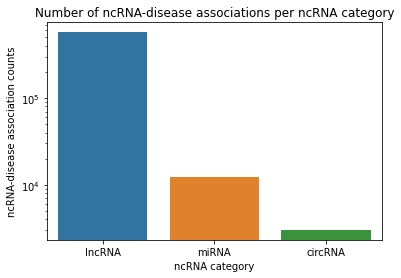

In [261]:
rna_category_counts = hmdd_lncrna_disnet['rna_category'].value_counts().to_frame()
rna_category_counts = rna_category_counts.reset_index()
#plot.figure(figsize=(15,10))

ax = sns.barplot(x=rna_category_counts['index'], y=rna_category_counts['rna_category'])
ax.set_yscale("log")
ax.set(xlabel='ncRNA category', ylabel='ncRNA-disease association counts')
ax.set(title='Number of ncRNA-disease associations per ncRNA category')


**Finding the most repeated ncRNA-disease associations**

In [381]:
ncrna_disease = hmdd_lncrna_disnet.groupby(['rna_id', 'name']).count()
ncrna_disease = ncrna_disease.reset_index()
ncrna_disease[['rna_id', 'name','disease_id']].sort_values(by=['disease_id'], ascending = False).head(20)

,rna_id,name,disease_id
102517,HOTAIR,stomach cancer,81
138838,UCA1,stomach cancer,81
74767,CDKN2B-AS1,coronary artery disease,80
123932,MALAT1,stomach cancer,63
100948,H19,stomach cancer,63
131486,PVT1,stomach cancer,63
123838,MALAT1,breast cancer,60
103698,IPW,Prader-Willi syndrome,60
102420,HOTAIR,breast cancer,60
74044,CASC15,stomach cancer,54


**Finding the most repeated miRNA-disease associations**

In [382]:
miRNA_only = hmdd_lncrna_disnet[hmdd_lncrna_disnet.rna_category == "miRNA"]
miRNA_only_grouped = miRNA_only.groupby(['rna_id', 'name']).count()
miRNA_only_grouped = miRNA_only_grouped.reset_index()
miRNA_only_grouped[['rna_id', 'name','disease_id']].sort_values(by=['disease_id'], ascending = False).head(20)

,rna_id,name,disease_id
3077,hsa-mir-21,Colorectal Neoplasms,30
1395,hsa-mir-145,Colorectal Neoplasms,26
4514,hsa-mir-34a,Colorectal Neoplasms,26
1326,hsa-mir-143,Colorectal Neoplasms,22
1967,hsa-mir-17,Colorectal Neoplasms,22
2835,hsa-mir-200c,Colorectal Neoplasms,20
4192,hsa-mir-31,Colorectal Neoplasms,20
1425,hsa-mir-145,Urinary Bladder Neoplasms,20
1358,hsa-mir-143,Urinary Bladder Neoplasms,18
2998,hsa-mir-20a,Colorectal Neoplasms,18


**Finding the most repeated lncRNA-disease associations**

In [384]:
lncRNA_only = hmdd_lncrna_disnet[hmdd_lncrna_disnet.rna_category == "lncRNA"]
lncRNA_only_grouped = lncRNA_only.groupby(['rna_id', 'name']).count()
lncRNA_only_grouped = lncRNA_only_grouped.reset_index()
lncRNA_only_grouped[['rna_id', 'name','disease_id']].sort_values(by=['disease_id'], ascending = False).head(20)

,rna_id,name,disease_id
138745,UCA1,stomach cancer,81
102471,HOTAIR,stomach cancer,81
74756,CDKN2B-AS1,coronary artery disease,80
100906,H19,stomach cancer,63
123885,MALAT1,stomach cancer,63
123791,MALAT1,breast cancer,60
103652,IPW,Prader-Willi syndrome,60
102374,HOTAIR,breast cancer,60
74743,CDKN2B-AS1,breast cancer,54
131421,PVT1,stomach cancer,54


**Finding the most repeated circRNA-disease associations**

In [386]:
circRNA_only = hmdd_lncrna_disnet[hmdd_lncrna_disnet.rna_category == "circRNA"]
circRNA_only_grouped = circRNA_only.groupby(['rna_id', 'name']).count()
circRNA_only_grouped = circRNA_only_grouped.reset_index()
circRNA_only_grouped[['rna_id', 'name','disease_id']].sort_values(by=['disease_id'], ascending = False).head(20)

,rna_id,name,disease_id
246,hsa-circRNA11783-2,coronary artery disease,20
366,hsa_circ_0000181,stomach cancer,18
357,hsa_circ_0000026,stomach cancer,18
280,hsa_circRNA_100269,stomach cancer,18
545,hsa_circ_0061276,stomach cancer,18
12,CDKN2B-AS1,arteriosclerotic cardiovascular disease,18
399,hsa_circ_0001017,stomach cancer,18
10,CASC15,stomach cancer,18
124,circ-ZFR,stomach cancer,18
332,hsa_circRNA_104423,stomach cancer,18


In [262]:
#counts of the number of times a ncRNA appears in a ncRNA-disease association.
ncrna = hmdd_lncrna_disnet['rna_id'].value_counts().to_frame()
ncrna_counts = ncrna.rename(columns={'rna_id': 'disease counts'})
ncrna_counts

,disease counts
HOTAIR,937
MALAT1,926
H19,840
CDKN2B-AS1,811
UCA1,697
...,...
oebiotech_13719,1
hsa-mir-350,1
hsa-mir-514,1
A_19_P00329564,1


In [263]:
#Calculates general statistics of the ncRNA-disease associations
print("mode ncRNA in a ncRNA-disease association is: " + str(hmdd_lncrna_disnet['rna_id'].mode()))
print("max number of ncRNA in ncRNA-disease association is: " + str(ncrna['rna_id'].max()))
print("min number of ncRNA in ncRNA-disease association is: " + str(ncrna['rna_id'].min()))
print("mean of ncRNA in ncRNA-disease association is: " + str(ncrna['rna_id'].mean()))
print("quantiles of the number of ncRNA-disease association are: \n"
      + str(ncrna['rna_id'].quantile([0.25,0.5,0.75])))
print("Times a ncRNA appears in a ncRNA-disease association standard deviation is: " + str(ncrna['rna_id'].std()))

mode ncRNA in a ncRNA-disease association is: 0    HOTAIR
dtype: object
max number of ncRNA in ncRNA-disease association is: 937
min number of ncRNA in ncRNA-disease association is: 1
mean of ncRNA in ncRNA-disease association is: 29.518830973184695
quantiles of the number of ncRNA-disease association are: 
0.25     9.0
0.50    21.0
0.75    46.0
Name: rna_id, dtype: float64
Times a ncRNA appears in a ncRNA-disease association standard deviation is: 37.753703263372465


Statistical parameters of miRNAs in miRNA-disease associations

In [266]:
miRNA = hmdd_lncrna_disnet.loc[hmdd_lncrna_disnet['rna_category'] == 'miRNA', 'rna_id'].to_frame()
miRNA_counts = miRNA['rna_id'].value_counts().to_frame()
print("mode of miRNA-disease associations per miRNA is: " + str(miRNA['rna_id'].mode()))
print("max number of miRNA-disease associations per miRNA is: " + str(miRNA_counts['rna_id'].max()))
print("min number of miRNA-disease associations per miRNA is: " + str(miRNA_counts['rna_id'].min()))
print("mean of miRNA-disease associations per miRNA is: " + str(miRNA_counts['rna_id'].mean()))
print("quantiles of miRNA-disease associations per miRNA are: \n"
      + str(miRNA_counts['rna_id'].quantile([0.25,0.5,0.75])))
print("miRNA-disease associations per miRNA standard deviation is: " + str(miRNA_counts['rna_id'].std()))
miRNA_counts = miRNA_counts.rename(columns={'rna_id': 'disease counts'})
#disease counts stands for the number of disease-ncRNA association in which a ncRNA appears.
miRNA_counts.head(10)

mode of miRNA-disease associations per miRNA is: 0    hsa-mir-21
dtype: object
max number of miRNA-disease associations per miRNA is: 364
min number of miRNA-disease associations per miRNA is: 1
mean of miRNA-disease associations per miRNA is: 14.23094688221709
quantiles of miRNA-disease associations per miRNA are: 
0.25     2.0
0.50     4.0
0.75    15.0
Name: rna_id, dtype: float64
miRNA-disease associations per miRNA standard deviation is: 27.479468123509015


,disease counts
hsa-mir-21,364
hsa-mir-155,244
hsa-mir-146a,207
hsa-mir-34a,172
hsa-mir-17,170
hsa-mir-126,159
hsa-mir-223,154
hsa-mir-221,141
hsa-mir-145,140
hsa-mir-20a,125


In [267]:
#number of different miRNA incorporated into DISNET
miRNA_only = hmdd_lncrna_disnet[hmdd_lncrna_disnet.rna_category == "miRNA"]
print(miRNA_only[['rna_id']].drop_duplicates().count())
#miRNA_only

rna_id    866
dtype: int64


Statistical parameters of LncRNAs in lncRNA-disease associations

In [270]:
lncRNA = hmdd_lncrna_disnet.loc[hmdd_lncrna_disnet['rna_category'] == 'lncRNA', 'rna_id'].to_frame()
lncRNA_counts = lncRNA['rna_id'].value_counts().to_frame()
print("mode of lncRNA-disease association per lncRNA is: " + str(lncRNA['rna_id'].mode()))
print("max number of lncRNA-disease association per lncRNA is: " + str(lncRNA_counts['rna_id'].max()))
print("min number of lncRNA-disease association per lncRNA is: " + str(lncRNA_counts['rna_id'].min()))
print("mean of the number of times a lncRNA appears in a lncRNA-disease association is: " + str(lncRNA_counts['rna_id'].mean()))
print("quantiles of the number of times a lncRNA appears in a lncRNA-disease association are: \n"
      + str(lncRNA_counts['rna_id'].quantile([0.25,0.5,0.75])))
print("lncRNA-disease associations' standard deviation is: " + str(lncRNA_counts['rna_id'].std()))
lncRNA_counts = lncRNA_counts.rename(columns={'rna_id': 'disease counts'})
lncRNA_counts

mode of lncRNA-disease association per lncRNA is: 0    HOTAIR
dtype: object
max number of lncRNA-disease association per lncRNA is: 937
min number of lncRNA-disease association per lncRNA is: 1
mean of the number of times a lncRNA appears in a lncRNA-disease association is: 30.954958364875093
quantiles of the number of times a lncRNA appears in a lncRNA-disease association are: 
0.25    21.0
0.50    21.0
0.75    50.0
Name: rna_id, dtype: float64
lncRNA-disease associations' standard deviation is: 38.282507707610655


,disease counts
HOTAIR,937
MALAT1,926
H19,840
CDKN2B-AS1,792
UCA1,697
...,...
TCONS_00026102,1
oebiotech_17301,1
ASAP1,1
AQP9,1


In [271]:
#number of different lncRNA incorporated into DISNET
lncRNA['rna_id'].nunique()

18494

Statistical parameters of CircRNAs in circRNA-disease associations

In [274]:
circRNA =hmdd_lncrna_disnet.loc[hmdd_lncrna_disnet['rna_category'] == 'circRNA', 'rna_id'].to_frame()
circRNA_counts = circRNA['rna_id'].value_counts().to_frame()
print("mode number of times a circRNA appears in acircRNA-disease is: " + str(circRNA['rna_id'].mode()))
print("max number of times a circRNA appears in a circRNA-disease is: " + str(circRNA_counts['rna_id'].max()))
print("min number of times a circRNA appears in a circRNA-disease is: " + str(circRNA_counts['rna_id'].min()))
print("mean of the number of times a circRNA appears associated is: " + str(circRNA_counts['rna_id'].mean()))
print("quantiles of the number of times of circRNA per appers are: \n"
      + str(circRNA_counts['rna_id'].quantile([0.25,0.5,0.75])))
print("The number of times a circRNA appears' standard deviation is: " + str(circRNA_counts['rna_id'].std()))
circRNA_counts = circRNA_counts.rename(columns={'rna_id': 'disease counts'})
circRNA_counts

mode number of times a circRNA appears in acircRNA-disease is: 0    CDR1-AS
dtype: object
max number of times a circRNA appears in a circRNA-disease is: 44
min number of times a circRNA appears in a circRNA-disease is: 1
mean of the number of times a circRNA appears associated is: 5.425760286225403
quantiles of the number of times of circRNA per appers are: 
0.25    2.0
0.50    4.0
0.75    9.0
Name: rna_id, dtype: float64
The number of times a circRNA appears' standard deviation is: 4.944253579879147


,disease counts
CDR1-AS,44
hsa_circ_0000284,38
hsa-circRNA11783-2,32
circPVT1,27
hsa_circ_0001649,25
...,...
hsa_circ_0057093,1
hsa_circ_0023117,1
hsa_circ_0008797,1
circRNA_100782,1


In [275]:
#number of different circRNA incorporated into DISNET
circRNA['rna_id'].nunique()

559

Combining All ncRNA, number of ncRNA-disease associations plots in one grid

In [278]:
miRNA_counts_1 = miRNA_counts.reset_index()
miRNA_counts_1['ncRNA'] = 'miRNA'
lncRNA_counts_1 = lncRNA_counts.reset_index()
lncRNA_counts_1['ncRNA'] = 'lncRNA'
circRNA_counts_1 = circRNA_counts.reset_index()
circRNA_counts_1['ncRNA'] = 'circRNA'
df_to_plot = pd.concat([miRNA_counts_1, lncRNA_counts_1, circRNA_counts_1])
df_to_plot

,index,disease counts,ncRNA
0,hsa-mir-21,364,miRNA
1,hsa-mir-155,244,miRNA
2,hsa-mir-146a,207,miRNA
3,hsa-mir-34a,172,miRNA
4,hsa-mir-17,170,miRNA
...,...,...,...
554,hsa_circ_0057093,1,circRNA
555,hsa_circ_0023117,1,circRNA
556,hsa_circ_0008797,1,circRNA
557,circRNA_100782,1,circRNA


[Text(0.5, 1.0, 'Logarithmic distribution of the number of ncRNA-disease associations per ncRNA')]

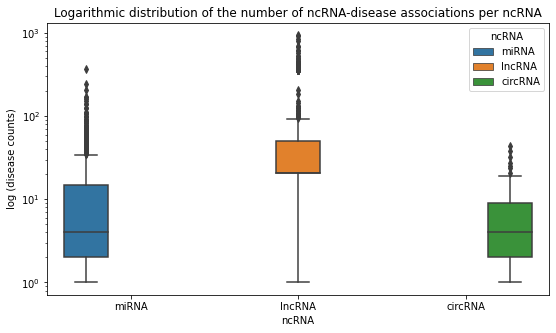

In [279]:
fig, ax = plot.subplots(figsize = (9, 5)) 
#plot.xlim(0, 200)
ax.set_yscale("log")
ax = sns.boxplot(y=df_to_plot['disease counts'], x=df_to_plot['ncRNA'], hue = df_to_plot['ncRNA'])
ax.set(xlabel='ncRNA', ylabel='log (disease counts)')
ax.set(title='Logarithmic distribution of the number of ncRNA-disease associations per ncRNA')

In [280]:
#-------------------------------------------------------------------

In [281]:
#----------------------------------------------------------------

**How many different diseases are associated to circRNAs, lncRNAs and miRNAs?**


In [292]:
disease_and_rna_no_dup = hmdd_lncrna_disnet[['rna_category', 'disease_id']].drop_duplicates()
print(disease_and_rna_no_dup.groupby(['rna_category']).nunique())
disease_and_rna = hmdd_lncrna_disnet[['rna_category', 'disease_id']]
print(disease_and_rna.groupby(['rna_category']).count())
print(disease_and_rna.groupby(['disease_id']).nunique().sort_values(by=['rna_category'], ascending=False))
print('-------------------------------------------------------')
print(disease_and_rna_no_dup.groupby(['disease_id']).count().sort_values(by=['rna_category'], ascending=False))
#hmdd_lncrna_disnet[['rna_category']].groupby()

              disease_id
rna_category            
circRNA              196
lncRNA               692
miRNA                359
              disease_id
rna_category            
circRNA             3033
lncRNA            572481
miRNA              12324
            rna_category
disease_id              
C0011849               3
C0003486               3
C0003873               3
C0029463               3
C2239176               3
...                  ...
C0037944               1
C0038165               1
C0038436               1
C0038454               1
C4290092               1

[970 rows x 1 columns]
-------------------------------------------------------
            rna_category
disease_id              
C0011849               3
C0003486               3
C0003873               3
C0029463               3
C2239176               3
...                  ...
C0037944               1
C0038165               1
C0038436               1
C0038454               1
C4290092               1

[970 rows x 1 colum

**Plotting the number of diseases per RNA category.**

[Text(0.5, 0, 'RNA category'), Text(0, 0.5, 'Disases counts')]

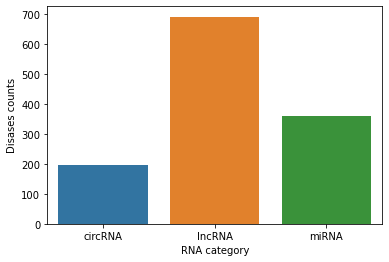

In [293]:
disease_and_rna_grouped = disease_and_rna.groupby(['rna_category']).nunique()
disease_and_rna_grouped = disease_and_rna_grouped.reset_index()
ax = sns.barplot(x=disease_and_rna_grouped['rna_category'], y=disease_and_rna_grouped['disease_id'])
ax.set(xlabel='RNA category', ylabel='Disases counts')
#ax.set(title='Number of different diseases per RNA category')#different diseases

Visualization of the logaritmic distribution of the number of ncRNA-disease associations per ncRNA

[Text(0.5, 0, 'ncRNA'), Text(0, 0.5, 'log (counts of unique diseases)')]

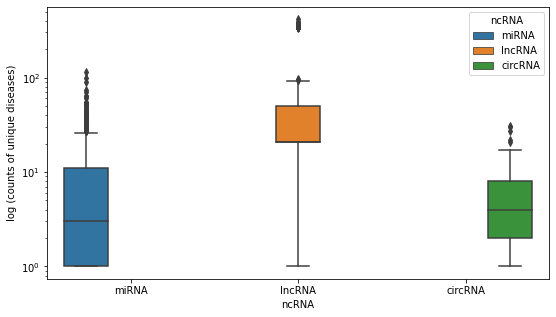

In [328]:
disease_mirna_grouped_sorted_1 = disease_mirna_grouped_sorted.reset_index()
disease_mirna_grouped_sorted_1['ncRNA'] = 'miRNA'
disease_lncrna_grouped_sorted_1 = disease_lncrna_grouped_sorted.reset_index()
disease_lncrna_grouped_sorted_1['ncRNA'] = 'lncRNA'
disease_circrna_grouped_sorted_1 = disease_circrna_grouped_sorted.reset_index()
disease_circrna_grouped_sorted_1['ncRNA'] = 'circRNA'
df_to_plot = pd.concat([disease_mirna_grouped_sorted_1, disease_lncrna_grouped_sorted_1, disease_circrna_grouped_sorted_1])
df_to_plot
fig, ax = plot.subplots(figsize = (9, 5)) 
#plot.xlim(0, 200)
ax.set_yscale("log")
ax = sns.boxplot(y=df_to_plot['counts of unique diseases'], x=df_to_plot['ncRNA'], hue = df_to_plot['ncRNA'])
ax.set(xlabel='ncRNA', ylabel='log (counts of unique diseases)')
#ax.set(title='Logarithmic distribution of the number of ncRNA-disease associations per ncRNA')

# Study of the relationships between the RNA features and DISNET features

In [335]:
import mysql.connector
import json
conn_param_file = 'C:/Users/end user/OneDrive/Desktop/UPM Master/CTB TFM/Datasets/DISNET_CONNECTION_correct.json'
# Setting the connection to the database

# The connection configuration is stored in a JSON file
with open(conn_param_file, 'r') as f:
    config = json.load(f) # The JSON file is translated to a pyhton dictionary

# Stablishing the connection with the parameters in the dictionary
cnx = mysql.connector.connect(**config)

In [336]:
# config['user']
# connection = create_engine_conn(None)

In [337]:
%reload_ext sql

In [338]:
query_tmp_icd  = """
                 SELECT*
                 FROM
                    disnet_biolayer.tmp_icd 


                """

query_tmp_icd = pd.read_sql_query(query_tmp_icd, con = cnx)
query_tmp_icd

,class_name,class_range
0,Certain conditions originating in the perinata...,P00-P96
1,Certain infectious and parasitic diseases,A00-B99
2,Codes for special purposes,U00-U85
3,"Congenital malformations, deformations and chr...",Q00-Q99
4,Diseases of the blood and blood-forming organs...,D50-D89
5,Diseases of the circulatory system,I00-I99
6,Diseases of the digestive system,K00-K93
7,Diseases of the ear and mastoid process,H60-H95
8,Diseases of the eye and adnexa,H00-H59
9,Diseases of the genitourinary system,N00-N99


The following query returns the ICD-10 classification names that correspond to each CUI in DISNET

In [339]:
query_icd = """
         SELECT DISTINCT
            d.disease_id, i.class_name, i.class_range
         FROM
            disnet_biolayer.disease d
                INNER JOIN
            disnet_biolayer.has_code hc ON d.disease_id = hc.disease_id
                LEFT JOIN
            disnet_biolayer.tmp_icd i ON 1 = 1
         WHERE
            hc.vocabulary = 'ICD10CM'
                AND SUBSTR(i.class_range, 1, 3) <= SUBSTR(hc.code_id, 1, 3)
                AND SUBSTR(i.class_range, 5, 3) >= SUBSTR(hc.code_id, 1, 3)

        """

query_icd = pd.read_sql_query(query_icd, con = cnx)
query_icd

,disease_id,class_name,class_range
0,C0008354,Certain infectious and parasitic diseases,A00-B99
1,C0178238,Certain infectious and parasitic diseases,A00-B99
2,C0041466,Certain infectious and parasitic diseases,A00-B99
3,C0030528,Certain infectious and parasitic diseases,A00-B99
4,C0152491,Certain infectious and parasitic diseases,A00-B99
...,...,...,...
3613,C0013182,"Injury, poisoning and certain other consequenc...",S00-T98
3614,C0041755,"Injury, poisoning and certain other consequenc...",S00-T98
3615,C0085639,External causes of morbidity and mortality,V01-Y98
3616,C0019699,Factors influencing health status and contact ...,Z00-Z99


In [340]:
query_disease_gene = """
                         SELECT*
                         FROM
                             disnet_biolayer.disease_gene
                        """

query_disease_gene = pd.read_sql_query(query_disease_gene, con = cnx)
query_disease_gene

,disease_id,gene_id,source_id,score,sio_id
0,C0000731,72,1,0.10,SIO_001121
1,C0000731,672,1,0.10,SIO_001121
2,C0000731,1280,1,0.10,SIO_001121
3,C0000731,1482,1,0.10,SIO_001121
4,C0000731,1811,1,0.10,SIO_001121
...,...,...,...,...,...
358204,C4540535,2778,1,0.30,SIO_001122
358205,C4540536,2778,1,0.30,SIO_001122
358206,C4540602,2778,1,0.30,SIO_001122
358207,C4543926,3060,1,0.03,SIO_001121


In [341]:
#query_disease_gene.to_excel("disease_gene_query.xlsx")

**Merging querey_disease_gene and query_icd dataframes and that merged df with a df containing the icd10 short version names**

In [342]:
disease_gene_icd= pd.merge(query_disease_gene, query_icd.drop(['class_name'], axis=1), on='disease_id')
disease_gene_icd = disease_gene_icd.drop(['source_id', 'sio_id','score'], axis=1)
icd_10_short = pd.read_csv('icd10_links.csv')
disease_gene_icd= pd.merge(disease_gene_icd, icd_10_short, on='class_range')
disease_gene_icd

,disease_id,gene_id,class_range,icd_class_name,class_name
0,C0000744,25,E00-E90,"Endocrine, nutritional and metabolic diseases",Metabolic
1,C0000744,27,E00-E90,"Endocrine, nutritional and metabolic diseases",Metabolic
2,C0000744,238,E00-E90,"Endocrine, nutritional and metabolic diseases",Metabolic
3,C0000744,338,E00-E90,"Endocrine, nutritional and metabolic diseases",Metabolic
4,C0000744,348,E00-E90,"Endocrine, nutritional and metabolic diseases",Metabolic
...,...,...,...,...,...
118041,C1691779,2707,H60-H95,Diseases of the ear and mastoid process,Ear
118042,C1691779,4036,H60-H95,Diseases of the ear and mastoid process,Ear
118043,C1691779,5172,H60-H95,Diseases of the ear and mastoid process,Ear
118044,C1691779,8772,H60-H95,Diseases of the ear and mastoid process,Ear


In [343]:
disease_gene_icd_test = disease_gene_icd[['disease_id', 'class_name', 'gene_id']]
#disease_gene_icd_test['gene_id'] = disease_gene_icd_test['gene_id'].apply(str)
disease_gene_icd_test = disease_gene_icd_test.groupby(['class_name', 'disease_id']).count()#.agg(num_feature_disease=('gene_id', sum))
#disease_gene_icd_test
disease_gene_icd_test = disease_gene_icd_test.reset_index()
disease_gene_icd_test = disease_gene_icd_test.rename(columns={'gene_id': 'num_feature_disease'})
disease_gene_icd_test['caracteristica'] = 'genes'
disease_gene_icd_test


,class_name,disease_id,num_feature_disease,caracteristica
0,Circulatory,C0002940,56,genes
1,Circulatory,C0002962,54,genes
2,Circulatory,C0002963,1,genes
3,Circulatory,C0002965,19,genes
4,Circulatory,C0003486,95,genes
...,...,...,...,...
2796,Skin,C0702166,44,genes
2797,Skin,C1112570,4,genes
2798,Skin,C1260874,1,genes
2799,Skin,C2936846,1,genes


In [344]:
disease_gene_icd['class_name'].describe()

count        118046
unique           17
top       Neoplasms
freq          27447
Name: class_name, dtype: object

In [345]:
disease_gene_icd.groupby(['class_name']).count()

,disease_id,gene_id,class_range,icd_class_name
class_name,,,,
Circulatory,8345,8345,8345,8345
Congenital,11574,11574,11574,11574
Digestive,8108,8108,8108,8108
Ear,1770,1770,1770,1770
Eye,5541,5541,5541,5541
Genitourinary,3810,3810,3810,3810
Immunitary,3385,3385,3385,3385
Infectious,3651,3651,3651,3651
Mental,10566,10566,10566,10566


**Processing ncRNA dataset to merge with disnet disease_gene table content**

In [346]:
hmdd_lncrna_disnet_to_merge = hmdd_lncrna_disnet.drop(['source_id', 'source_name','vocab'], axis=1)
hmdd_lncrna_disnet_to_merge

,rna_id,causality,type,name,rna_category,disease_id
0,hsa-mir-143,no,circulation_biomarker_diagnosis_down,Colonic Neoplasms,miRNA,C0007102
1,hsa-mir-143,no,circulation_biomarker_diagnosis_down,Colonic Neoplasms,miRNA,C0009375
2,hsa-mir-145,no,circulation_biomarker_diagnosis_down,Colonic Neoplasms,miRNA,C0007102
3,hsa-mir-145,no,circulation_biomarker_diagnosis_down,Colonic Neoplasms,miRNA,C0009375
4,hsa-let-7g,no,circulation_biomarker_diagnosis_ns,Colonic Neoplasms,miRNA,C0007102
...,...,...,...,...,...,...
587833,UCA1,ns,Regulation [down-regulated],Lithiasis,lncRNA,C0023869
587834,Uph,ns,Locus,Right ventricle hypoplasia,lncRNA,C1848587
587835,XIST,ns,Regulation [up-regulated],collecting duct carcinoma,lncRNA,C0007134
587836,XIST,ns,Regulation [up-regulated],collecting duct carcinoma,lncRNA,C1266044


In [347]:
hmdd_lncrna_disnet_to_merge.describe()

,rna_id,causality,type,name,rna_category,disease_id
count,587838,587838,587838,587838,587838,587838
unique,19914,3,233,633,3,970
top,HOTAIR,ns,ns,stomach cancer,lncRNA,C0024299
freq,937,575514,541732,127935,572481,14550


**Merging hmdd_lncrna_disnet_to_merge (RNA df) and query_icd (icd terms df) dataframes and that merged df with a df containing the icd10 short version names**

In [348]:
hmdd_lncrna_disnet_to_merge_1 = hmdd_lncrna_disnet_to_merge[['rna_id', 'disease_id']]
icd_rna= pd.merge(hmdd_lncrna_disnet_to_merge_1, query_icd.drop(['class_name'], axis=1), on='disease_id')
icd_rna
# disease_gene_icd = disease_gene_icd.drop(['source_id', 'sio_id','score'], axis=1)
icd_10_short = pd.read_csv('icd10_links.csv')
icd_rna= pd.merge(icd_rna, icd_10_short, on='class_range')
icd_rna

,rna_id,disease_id,class_range,icd_class_name,class_name
0,hsa-mir-143,C0007102,C00-D48,Neoplasms,Neoplasms
1,hsa-mir-145,C0007102,C00-D48,Neoplasms,Neoplasms
2,hsa-let-7g,C0007102,C00-D48,Neoplasms,Neoplasms
3,hsa-mir-155,C0007102,C00-D48,Neoplasms,Neoplasms
4,hsa-mir-145,C0007102,C00-D48,Neoplasms,Neoplasms
...,...,...,...,...,...
232026,hsa-mir-182,C0018776,H60-H95,Diseases of the ear and mastoid process,Ear
232027,hsa-mir-183,C0018776,H60-H95,Diseases of the ear and mastoid process,Ear
232028,hsa-mir-96,C0018776,H60-H95,Diseases of the ear and mastoid process,Ear
232029,hsa-mir-183,C0018776,H60-H95,Diseases of the ear and mastoid process,Ear


In [349]:
icd_rna = icd_rna[['disease_id', 'class_name', 'rna_id']]
#disease_gene_icd_test['gene_id'] = disease_gene_icd_test['gene_id'].apply(str)
icd_rna_1 = icd_rna.groupby(['class_name', 'disease_id']).count()#agg(num_feature_disease=('rna_id', sum))
icd_rna_1 = icd_rna_1.reset_index()
# icd_rna_1 = icd_rna.reset_index()
icd_rna_1 = icd_rna_1.rename(columns={'rna_id': 'num_feature_disease'})
icd_rna_1['caracteristica'] = 'ncRNA'
icd_rna_1

,class_name,disease_id,num_feature_disease,caracteristica
0,Circulatory,C0002940,1,ncRNA
1,Circulatory,C0003486,129,ncRNA
2,Circulatory,C0003811,20,ncRNA
3,Circulatory,C0003850,135,ncRNA
4,Circulatory,C0004153,301,ncRNA
...,...,...,...,...
449,Skin,C0042900,3,ncRNA
450,Skin,C0162810,15,ncRNA
451,Skin,C0162820,2,ncRNA
452,Skin,C0162836,1,ncRNA


In [350]:
icd_rna_1.groupby(['class_name']).sum()

,num_feature_disease
class_name,
Circulatory,5310
Congenital,4083
Digestive,1146
Ear,23
Eye,293
Genitourinary,964
Immunitary,436
Infectious,5120
Mental,4159


In [351]:
#icd_rna_1.to_excel('icd_rna_1.xlsx')

**Concat function on disease_gene_icd_test and icd_rna dataframes**

[Text(0.5, 1.0, 'Gene and ncRNA distribution per ICD10 disease group')]

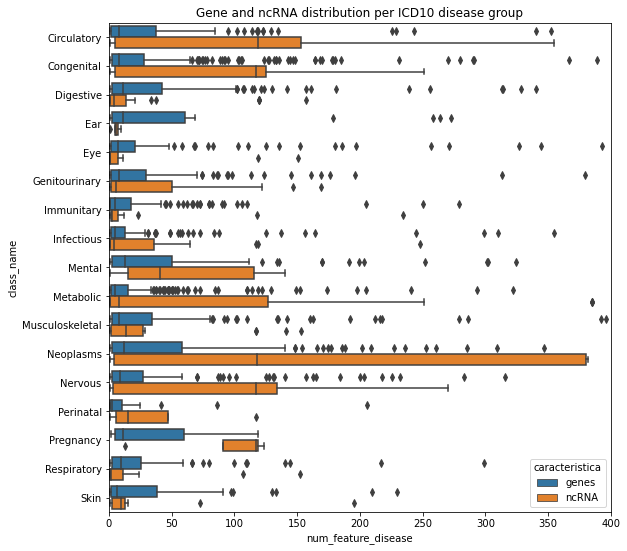

In [352]:
df_to_plot = pd.concat([disease_gene_icd_test, icd_rna_1])
fig, ax = plot.subplots(figsize = (9, 9)) 
plot.xlim(0, 400)
ax = sns.boxplot(data=df_to_plot, x='num_feature_disease', y='class_name', hue='caracteristica')
ax.set(xlabel='num_feature_disease', ylabel='class_name')
ax.set(title='Gene and ncRNA distribution per ICD10 disease group')

**DISEASE_VARIANTS_RNAs Boxplot generation**

In [353]:
query_variants = """
                 SELECT*
                 FROM
                     disnet_biolayer.disease_variant
                """

query_variants = pd.read_sql_query(query_variants, con = cnx)
query_variants

,disease_id,variant_id,source_id,score
0,C0000737,rs1057518806,1,0.70
1,C0000737,rs1057518886,1,0.70
2,C0000744,rs146064714,1,0.70
3,C0000744,rs199422219,1,0.70
4,C0000744,rs199422220,1,0.80
...,...,...,...,...
210493,C4540536,rs148033592,1,0.70
210494,C4540536,rs61749698,1,0.70
210495,C4540602,rs148033592,1,0.70
210496,C4540602,rs61749698,1,0.70


In [354]:
query_icd

,disease_id,class_name,class_range
0,C0008354,Certain infectious and parasitic diseases,A00-B99
1,C0178238,Certain infectious and parasitic diseases,A00-B99
2,C0041466,Certain infectious and parasitic diseases,A00-B99
3,C0030528,Certain infectious and parasitic diseases,A00-B99
4,C0152491,Certain infectious and parasitic diseases,A00-B99
...,...,...,...
3613,C0013182,"Injury, poisoning and certain other consequenc...",S00-T98
3614,C0041755,"Injury, poisoning and certain other consequenc...",S00-T98
3615,C0085639,External causes of morbidity and mortality,V01-Y98
3616,C0019699,Factors influencing health status and contact ...,Z00-Z99


Here we generate a df merging query_variants and query_icd dataframes to associate the ICD10 classification disease groups to the CUIs of the diseases associated to variants.

In [355]:
disease_variant_icd= pd.merge(query_variants, query_icd.drop(['class_name'], axis=1), on='disease_id')# query_disease_variant es un df de la tabla #disease_variant y query_icd un df de la consulta icd
disease_variant_icd = disease_variant_icd.drop(['source_id','score'], axis=1)
icd_10_short = pd.read_csv('icd10_links.csv')
disease_variant_icd= pd.merge(disease_variant_icd, icd_10_short, on='class_range')
disease_variant_icd

disease_variant_icd_test = disease_variant_icd[['disease_id', 'class_name', 'variant_id']]
disease_variant_icd_test = disease_variant_icd_test.groupby(['class_name', 'disease_id']).count()
disease_variant_icd_test = disease_variant_icd_test.reset_index()
disease_variant_icd_test = disease_variant_icd_test.rename(columns={'variant_id': 'num_feature_disease'})
disease_variant_icd_test['caracteristica'] = 'variants'
disease_variant_icd_test

,class_name,disease_id,num_feature_disease,caracteristica
0,Circulatory,C0002940,7,variants
1,Circulatory,C0002962,64,variants
2,Circulatory,C0002963,2,variants
3,Circulatory,C0002965,4,variants
4,Circulatory,C0003486,9,variants
...,...,...,...,...
1623,Skin,C0406317,1,variants
1624,Skin,C0409974,17,variants
1625,Skin,C0477474,1,variants
1626,Skin,C0702166,8,variants


In [357]:
query_pathways = """
                 SELECT DISTINCT
                 dg.disease_id,
                 gp.pathway_id
                 FROM
                     disnet_biolayer.disease_gene dg
                         INNER JOIN
                     disnet_biolayer.gene g ON dg.gene_id = g.gene_id
                         INNER JOIN
                     disnet_biolayer.gene_pathway gp ON g.gene_id = gp.gene_id
                """

query_pathways = pd.read_sql_query(query_pathways, con = cnx)
query_pathways

,disease_id,pathway_id
0,C0000731,WP117
1,C0000731,WP138
2,C0000731,WP15
3,C0000731,WP1533
4,C0000731,WP1544
...,...,...
400696,C4540602,WP734
400697,C4545381,WP306
400698,C4545381,WP322
400699,C4545381,WP3611


In [359]:
disease_pathways_icd= pd.merge(query_pathways, query_icd.drop(['class_name'], axis=1), on='disease_id')# query_disease_pathways es un df de la tabla #disease_pathways y query_icd un df de la consulta icd
#disease_pathways_icd #= disease_pathways_icd.drop(['source_id','score'], axis=1)
icd_10_short = pd.read_csv('icd10_links.csv')
disease_pathways_icd= pd.merge(disease_pathways_icd, icd_10_short, on='class_range')
disease_pathways_icd

disease_pathways_icd_test = disease_pathways_icd[['disease_id', 'class_name', 'pathway_id']]
disease_pathways_icd_test = disease_pathways_icd_test.groupby(['class_name', 'disease_id']).count()
disease_pathways_icd_test = disease_pathways_icd_test.reset_index()
disease_pathways_icd_test = disease_pathways_icd_test.rename(columns={'pathway_id': 'num_feature_disease'})
disease_pathways_icd_test['caracteristica'] = 'pathway'
disease_pathways_icd_test

,class_name,disease_id,num_feature_disease,caracteristica
0,Circulatory,C0002940,120,pathway
1,Circulatory,C0002962,96,pathway
2,Circulatory,C0002963,8,pathway
3,Circulatory,C0002965,79,pathway
4,Circulatory,C0003486,139,pathway
...,...,...,...,...
2423,Skin,C0549567,9,pathway
2424,Skin,C0600336,1,pathway
2425,Skin,C0702166,81,pathway
2426,Skin,C1112570,4,pathway


In [ ]:
#disease_pathways_icd_test.to_excel('pathway.xlsx')

**ncRNA, genes, variants and pathways distribution per ICD10 disease group boxplots' chart**

[Text(0.5, 1.0, 'ncRNA, genes, variants and pathways distribution per ICD10 disease group')]

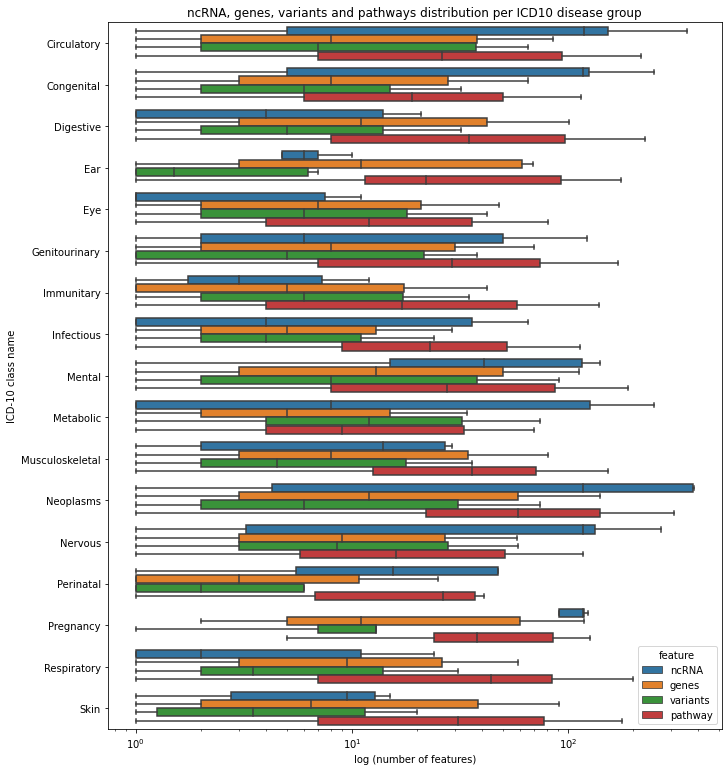

In [380]:
df_to_plot = pd.concat([icd_rna_1, disease_gene_icd_test, disease_variant_icd_test, disease_pathways_icd_test])
df_to_plot= df_to_plot.rename(columns={'caracteristica': 'feature'})
fig, ax = plot.subplots(figsize = (11, 13)) 
#plot.xlim(0, 400)
ax.set_xscale("log")
ax = sns.boxplot(data=df_to_plot, x='num_feature_disease', y='class_name', hue='feature', showfliers = False)
ax.set(xlabel='log (number of features)', ylabel='ICD-10 class name')
ax.set(title='ncRNA, genes, variants and pathways distribution per ICD10 disease group')

The distribution of ncRNAs per diseases is significantly different than the other feature-disease distributions. The least homogeneous ncRNA distribution per diseases of all is that of neoplasms where a disease can be in an association with less than 100 ncRNAs or more than 10000 ncRNAs.

ncRNA-gene-variant-pathway:
Neoplasms: 50% of the diseases have less than 100 ncRNA-disease associations and its third quartile between 100 and 1000. However there are outlier diseases that have about 1000 and 10000 disease associations. About gene-neoplasm associations, 50% of the total neoplasms have less than 50 genes-disease associations and the 100% of the neoplasms has less than 100 genes associated. However there are outlier diseases that have between 1000 and 10000 genes associated.

**Genes vs miRNAs vs lncRNAs vs circRNAs Boxplot generation**

In [362]:
hmdd_lncrna_disnet_to_merge

,rna_id,causality,type,name,rna_category,disease_id
0,hsa-mir-143,no,circulation_biomarker_diagnosis_down,Colonic Neoplasms,miRNA,C0007102
1,hsa-mir-143,no,circulation_biomarker_diagnosis_down,Colonic Neoplasms,miRNA,C0009375
2,hsa-mir-145,no,circulation_biomarker_diagnosis_down,Colonic Neoplasms,miRNA,C0007102
3,hsa-mir-145,no,circulation_biomarker_diagnosis_down,Colonic Neoplasms,miRNA,C0009375
4,hsa-let-7g,no,circulation_biomarker_diagnosis_ns,Colonic Neoplasms,miRNA,C0007102
...,...,...,...,...,...,...
587833,UCA1,ns,Regulation [down-regulated],Lithiasis,lncRNA,C0023869
587834,Uph,ns,Locus,Right ventricle hypoplasia,lncRNA,C1848587
587835,XIST,ns,Regulation [up-regulated],collecting duct carcinoma,lncRNA,C0007134
587836,XIST,ns,Regulation [up-regulated],collecting duct carcinoma,lncRNA,C1266044


Generating dataframes for miRNA, lncRNA and circRNA only based on hmdd_lncrna_disnet_to_merge

In [363]:
hmdd_lncrna_disnet_drop = hmdd_lncrna_disnet_to_merge
hmdd_lncrna_disnet_mirna = hmdd_lncrna_disnet_drop[hmdd_lncrna_disnet.rna_category == "miRNA"]
hmdd_lncrna_disnet_lncrna = hmdd_lncrna_disnet_drop[hmdd_lncrna_disnet.rna_category == "lncRNA"]
hmdd_lncrna_disnet_circrna = hmdd_lncrna_disnet_drop[hmdd_lncrna_disnet.rna_category == "circRNA"]

In [364]:
hmdd_lncrna_disnet_lncrna

,rna_id,causality,type,name,rna_category,disease_id
528,ZEB1,ns,Expression [high expression],Colonic Neoplasms,lncRNA,C0007102
529,ZEB1,ns,Expression [high expression],Colonic Neoplasms,lncRNA,C0009375
530,ZFAS1,ns,Expression [high expression],Colonic Neoplasms,lncRNA,C0007102
531,ZFAS1,ns,Expression [high expression],Colonic Neoplasms,lncRNA,C0009375
2475,E2F4,ns,ns,Colorectal Neoplasms,lncRNA,C0009402
...,...,...,...,...,...,...
587833,UCA1,ns,Regulation [down-regulated],Lithiasis,lncRNA,C0023869
587834,Uph,ns,Locus,Right ventricle hypoplasia,lncRNA,C1848587
587835,XIST,ns,Regulation [up-regulated],collecting duct carcinoma,lncRNA,C0007134
587836,XIST,ns,Regulation [up-regulated],collecting duct carcinoma,lncRNA,C1266044


In [365]:
query_icd

,disease_id,class_name,class_range
0,C0008354,Certain infectious and parasitic diseases,A00-B99
1,C0178238,Certain infectious and parasitic diseases,A00-B99
2,C0041466,Certain infectious and parasitic diseases,A00-B99
3,C0030528,Certain infectious and parasitic diseases,A00-B99
4,C0152491,Certain infectious and parasitic diseases,A00-B99
...,...,...,...
3613,C0013182,"Injury, poisoning and certain other consequenc...",S00-T98
3614,C0041755,"Injury, poisoning and certain other consequenc...",S00-T98
3615,C0085639,External causes of morbidity and mortality,V01-Y98
3616,C0019699,Factors influencing health status and contact ...,Z00-Z99


In [366]:
icd_mirna= pd.merge(hmdd_lncrna_disnet_mirna, query_icd.drop(['class_name'], axis=1), on='disease_id')
icd_10_short = pd.read_csv('icd10_links.csv')
icd_mirna_1= pd.merge(icd_mirna, icd_10_short, on='class_range')
icd_mirna_1

icd_mirna_1 = icd_mirna_1[['disease_id', 'class_name', 'rna_id']]
#disease_gene_icd_test['gene_id'] = disease_gene_icd_test['gene_id'].apply(str)
icd_mirna_2 = icd_mirna_1.groupby(['class_name', 'disease_id']).count()#agg(num_feature_disease=('rna_id', sum))
icd_mirna_2 = icd_mirna_2.reset_index()
# icd_rna_1 = icd_rna.reset_index()
icd_mirna_2 = icd_mirna_2.rename(columns={'rna_id': 'num_feature_disease'})
icd_mirna_2['caracteristica'] = 'miRNA'
icd_mirna_2


,class_name,disease_id,num_feature_disease,caracteristica
0,Circulatory,C0003486,10,miRNA
1,Circulatory,C0003811,20,miRNA
2,Circulatory,C0007192,5,miRNA
3,Circulatory,C0010054,125,miRNA
4,Circulatory,C0018799,337,miRNA
...,...,...,...,...
195,Skin,C0038165,2,miRNA
196,Skin,C0042900,3,miRNA
197,Skin,C0162810,15,miRNA
198,Skin,C0162820,2,miRNA


In [367]:
icd_mirna_2.groupby(['class_name']).sum()

,num_feature_disease
class_name,
Circulatory,782
Congenital,75
Digestive,319
Ear,23
Eye,56
Genitourinary,220
Immunitary,75
Infectious,488
Mental,179


In [368]:
icd_lncrna= pd.merge(hmdd_lncrna_disnet_lncrna, query_icd.drop(['class_name'], axis=1), on='disease_id')
icd_10_short = pd.read_csv('icd10_links.csv')
icd_lncrna_1= pd.merge(icd_lncrna, icd_10_short, on='class_range')

icd_lncrna_1 = icd_lncrna_1[['disease_id', 'class_name', 'rna_id']]
#disease_gene_icd_test['gene_id'] = disease_gene_icd_test['gene_id'].apply(str)
icd_lncrna_2 = icd_lncrna_1.groupby(['class_name', 'disease_id']).count()#agg(num_feature_disease=('rna_id', sum))
icd_lncrna_2 = icd_lncrna_2.reset_index()
# icd_rna_1 = icd_rna.reset_index()
icd_lncrna_2 = icd_lncrna_2.rename(columns={'rna_id': 'num_feature_disease'})
icd_lncrna_2['caracteristica'] = 'lncRNA'
icd_lncrna_2

,class_name,disease_id,num_feature_disease,caracteristica
0,Circulatory,C0002940,1,lncRNA
1,Circulatory,C0003486,118,lncRNA
2,Circulatory,C0003850,131,lncRNA
3,Circulatory,C0004153,269,lncRNA
4,Circulatory,C0007193,121,lncRNA
...,...,...,...,...
294,Respiratory,C1260881,1,lncRNA
295,Respiratory,C1319018,1,lncRNA
296,Respiratory,C1800706,1,lncRNA
297,Skin,C0022548,2,lncRNA


In [369]:
icd_lncrna_2.groupby(['class_name']).sum()

,num_feature_disease
class_name,
Circulatory,4251
Congenital,3982
Digestive,769
Eye,237
Genitourinary,733
Immunitary,361
Infectious,4618
Mental,3955
Metabolic,2150


In [ ]:
#icd_lncrna_2.to_excel('icd_lncrna_2.xlsx')

In [370]:
icd_circrna= pd.merge(hmdd_lncrna_disnet_circrna, query_icd.drop(['class_name'], axis=1), on='disease_id')
icd_10_short = pd.read_csv('icd10_links.csv')
icd_circrna_1= pd.merge(icd_circrna, icd_10_short, on='class_range')

icd_circrna_1 = icd_circrna_1[['disease_id', 'class_name', 'rna_id']]
#disease_gene_icd_test['gene_id'] = disease_gene_icd_test['gene_id'].apply(str)
icd_circrna_2 = icd_circrna_1.groupby(['class_name', 'disease_id']).count()#agg(num_feature_disease=('rna_id', sum))
icd_circrna_2 = icd_circrna_2.reset_index()
# icd_rna_1 = icd_rna.reset_index()
icd_circrna_2 = icd_circrna_2.rename(columns={'rna_id': 'num_feature_disease'})
icd_circrna_2['caracteristica'] = 'circRNA'
icd_circrna_2

,class_name,disease_id,num_feature_disease,caracteristica
0,Circulatory,C0003486,1,circRNA
1,Circulatory,C0003850,4,circRNA
2,Circulatory,C0004153,32,circRNA
3,Circulatory,C0007193,1,circRNA
4,Circulatory,C0010054,32,circRNA
...,...,...,...,...
88,Neoplasms,C2854122,8,circRNA
89,Nervous,C0002395,1,circRNA
90,Nervous,C0026769,12,circRNA
91,Skin,C0001144,10,circRNA


**Genes vs miRNAs vs lncRNAs vs circRNAs**

[Text(0.5, 1.0, 'Genes, miRNA, lncRNA and circRNA distribution per ICD10 disease group')]

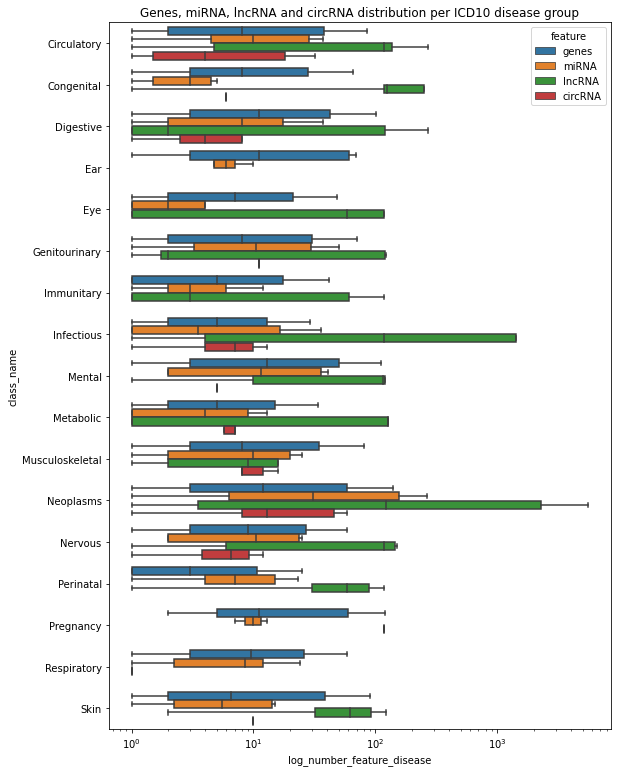

In [371]:
df_to_plot = pd.concat([disease_gene_icd_test, icd_mirna_2, icd_lncrna_2, icd_circrna_2])
df_to_plot_1 = df_to_plot.rename(columns={'caracteristica': 'feature'})
fig, ax = plot.subplots(figsize = (9, 13)) 
#plot.xlim(0, 500)
ax.set_xscale("log")
ax = sns.boxplot(data=df_to_plot_1, x='num_feature_disease', y='class_name', hue='feature', showfliers = False)
ax.set(xlabel='log_number_feature_disease', ylabel='class_name')
ax.set(title='Genes, miRNA, lncRNA and circRNA distribution per ICD10 disease group')

**Variants vs miRNAs vs lncRNAs vs circRNAs**

[Text(0.5, 1.0, 'Variants, miRNA, lncRNA and circRNA distribution per ICD10 disease group')]

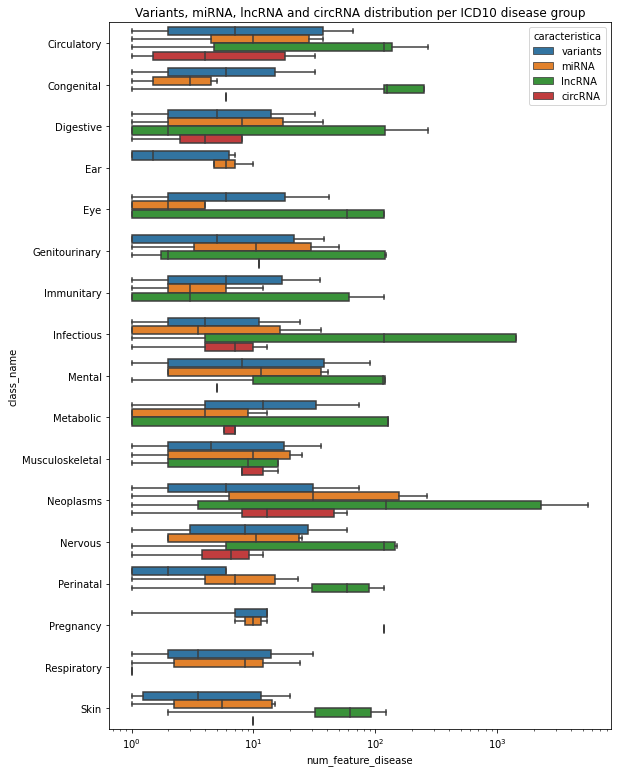

In [372]:
df_to_plot = pd.concat([disease_variant_icd_test, icd_mirna_2, icd_lncrna_2, icd_circrna_2])
fig, ax = plot.subplots(figsize = (9, 13)) 
#plot.xlim(0, 500)
ax.set_xscale("log")
ax = sns.boxplot(data=df_to_plot, x='num_feature_disease', y='class_name', hue='caracteristica', showfliers = False)
ax.set(xlabel='num_feature_disease', ylabel='class_name')
ax.set(title='Variants, miRNA, lncRNA and circRNA distribution per ICD10 disease group')
#ax.set(title='Pathway and RNA distribution per ICD10 disease group')

**Pathways vs miRNAs vs lncRNAs vs circRNAs**

[Text(0.5, 1.0, 'Pathways, miRNA, lncRNA and circRNA distribution per ICD10 disease group')]

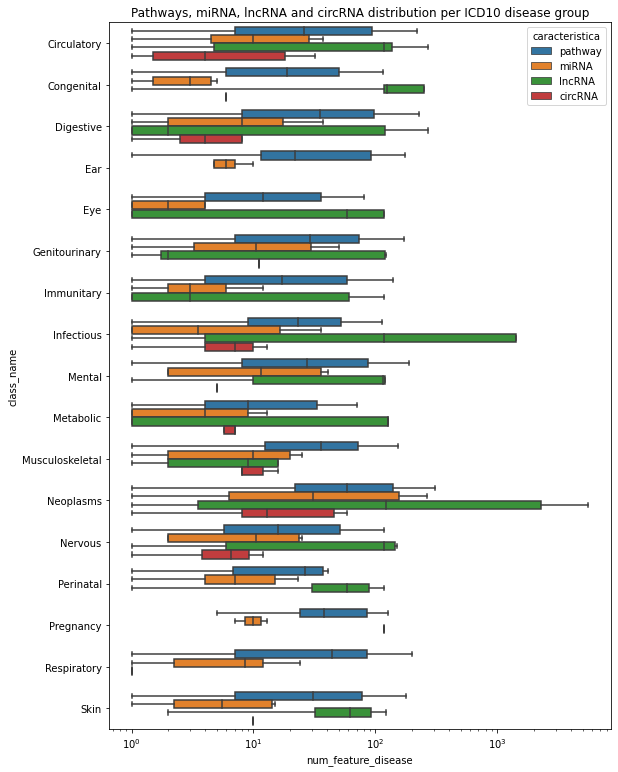

In [373]:
df_to_plot = pd.concat([disease_pathways_icd_test, icd_mirna_2, icd_lncrna_2, icd_circrna_2])
fig, ax = plot.subplots(figsize = (9, 13)) 
#plot.xlim(0, 500)
ax.set_xscale("log")
ax = sns.boxplot(data=df_to_plot, x='num_feature_disease', y='class_name', hue='caracteristica', showfliers = False)
ax.set(xlabel='num_feature_disease', ylabel='class_name')
ax.set(title='Pathways, miRNA, lncRNA and circRNA distribution per ICD10 disease group')
#ax.set(title='Pathway and RNA distribution per ICD10 disease group')

In [375]:
df_to_plot

,class_name,disease_id,num_feature_disease,caracteristica
0,Circulatory,C0002940,120,pathway
1,Circulatory,C0002962,96,pathway
2,Circulatory,C0002963,8,pathway
3,Circulatory,C0002965,79,pathway
4,Circulatory,C0003486,139,pathway
...,...,...,...,...
88,Neoplasms,C2854122,8,circRNA
89,Nervous,C0002395,1,circRNA
90,Nervous,C0026769,12,circRNA
91,Skin,C0001144,10,circRNA


**Boxplot comparing the genes, variants, pathways, miRNA, lncRNA and circRNA distributions per ICD-10
disease group**

[Text(0.5, 0, 'log_num_feature_disease'), Text(0, 0.5, 'class_name')]

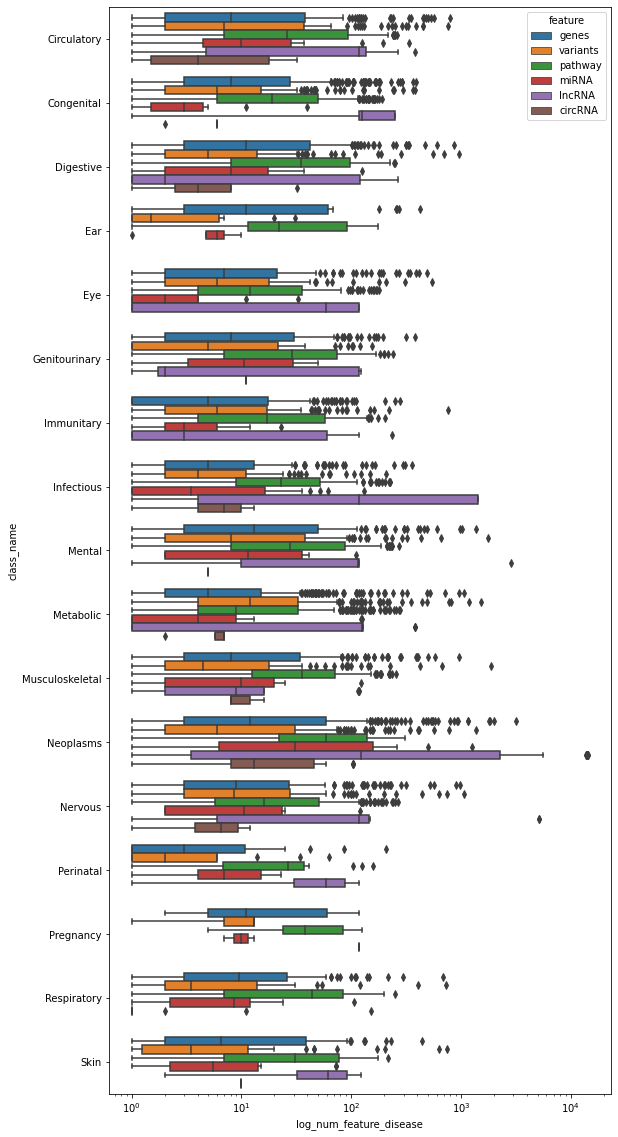

In [376]:
df_to_plot = pd.concat([disease_gene_icd_test,disease_variant_icd_test, disease_pathways_icd_test, icd_mirna_2, icd_lncrna_2, icd_circrna_2])
df_to_plot_1 = df_to_plot.rename(columns={'caracteristica': 'feature'})
fig, ax = plot.subplots(figsize = (9, 20)) 
ax.set_xscale("log")
#plot.xlim(0, 500)
ax = sns.boxplot(data=df_to_plot_1, x='num_feature_disease', y='class_name', hue='feature')
ax.set(xlabel='log_num_feature_disease', ylabel='class_name')
#ax.set(title='Pathway and RNA distribution per ICD10 disease group')

In [ ]:
#######################################################################

In [377]:
df_to_plot = pd.concat([icd_mirna_2, icd_lncrna_2, icd_circrna_2])
df_to_plot

,class_name,disease_id,num_feature_disease,caracteristica
0,Circulatory,C0003486,10,miRNA
1,Circulatory,C0003811,20,miRNA
2,Circulatory,C0007192,5,miRNA
3,Circulatory,C0010054,125,miRNA
4,Circulatory,C0018799,337,miRNA
...,...,...,...,...
88,Neoplasms,C2854122,8,circRNA
89,Nervous,C0002395,1,circRNA
90,Nervous,C0026769,12,circRNA
91,Skin,C0001144,10,circRNA


[Text(0.5, 0, 'log_num_feature_disease'), Text(0, 0.5, 'class_name')]

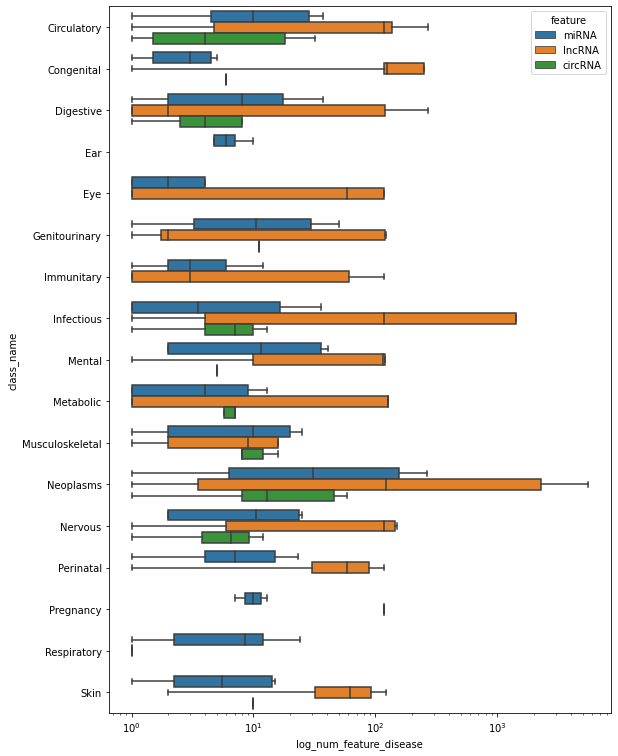

In [378]:
df_to_plot = pd.concat([icd_mirna_2, icd_lncrna_2, icd_circrna_2])
df_to_plot_1 = df_to_plot.rename(columns={'caracteristica': 'feature'})
fig, ax = plot.subplots(figsize = (9, 13)) 
ax.set_xscale("log")
#plot.xlim(0, 500)
ax = sns.boxplot(data=df_to_plot_1, x='num_feature_disease', y='class_name', hue='feature', showfliers = False)
ax.set(xlabel='log_num_feature_disease', ylabel='class_name')